In [1]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("max_colwidth", 200)

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os.path
import fuzzywuzzy as fz
import googletrans as gtr
import translate as tr
import langdetect as ld
import scipy as sp

os.getcwd()

'C:\\Users\\ykele\\Openclassrooms\\P4_keles_yalcin_consommationNRJ'

In [2]:
from hyperopt import hp

import optuna

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

from sklearn.dummy import DummyRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

import xgboost

from numpy import asarray

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn import datasets

import timeit

from sklearn import metrics

import shap
import lime.lime_tabular

# Début Modélisation : 

In [262]:

df_NRJ = pd.read_csv('P4_Modelisation.csv')
df_NRJ.drop(["Unnamed: 0"],axis='columns',inplace=True)

In [263]:
df_NRJ

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType                    Address  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu) ComplianceStatus  GHGEmissions(MetricTonsCO2e)  ThirdLargestPropertyUseTypeGFA  Electricity  Steam  NaturalGas  log_NumberofFloors  log_NumberofBuildings  log_PropertyGFATotal  BALLARD  CENTRAL  DELRIDGE  DOWNTOWN  EAST  GREATER DUWAMISH  LAKE UNION  MAGNOLIA / QUEEN ANNE  NORTH  NORTHEAST  NORTHWEST  SOUTHEAST  SOUTHWEST  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7  Decade  1900_1909  1910_1919  1920_1929  1930_1939  1940_1949  1950_1959  1960_1969  1970_1979  1980_1989  1990_1999  2000_2009  2010_2019  College/University  Distribution Center  Hospital  Hotel  K_12 School  Laboratory  \
0                 1      2015  NonResidential                        Hotel              405 olive way  98101.0                     659000030                    7          DOWNTOWN       1927                1.0            12.0             88434             65.0           6981428.00        Compliant                        249.43                             NaN            1      0           0            2.484907                    0.0             11.390012        0        0         0         1     0                 0           0                      0      0          0          0          0          0                      0                      0                      0                      0                      0                      0                      1      20          0          0          1          0          0          0          0          0          0          0          0          0                   0                    0         0      1            0           0   
1                 2      2015  NonResidential                        Hotel                724 pine st  98101.0                     659000220                    7          DOWNTOWN       1996                1.0            11.0            103566             51.0           8354235.00        Compliant                        263.51                             NaN            0      0           1            2.397895                    0.0             11.547964        0        0         0         1     0                 0           0                      0      0          0          0          0          0                      0                      0                      0                      0                      0                      0                      1      90          0          0          0          0          0          0          0          0          0          1          0          0                   0                    0         0      1            0           0   
2                10      2015  NonResidential                        Hotel               1619 9th ave  98101.0                     660000825                    7          DOWNTOWN       1926                1.0            11.0             83008             25.0           6252842.00        Compliant                        208.46                             NaN            0      0           1            2.397895                    0.0             11.326692        0        0         0         1     0                 0           0                      0      0          0          0          0          0                      0                      0                      0                      0                      0                      0                      1      20          0          0          1          0          0          0          0          0          0          0          0          0                   0                    0         0      1            0           0   
3                11      2015  Non

In [60]:
df_NRJ_initial=df_NRJ

In [61]:

xtrain_columns=['NumberofBuildings','NumberofFloors','PropertyGFATotal']+list(df_NRJ.columns[18:])


# attention : test en cours avec 'Multifamily HR (10+)','Multifamily LR (1-4)','Multifamily MR (5-9)', et tous les autres
# buildingTypes autre que nonResidential en moins

# ajout des primary propert Types sachant que Building Types est filtré sur non residential

# suppression de numberofbuildings (pas centré réduite et difficile de le faire)

xtrain_columns_V2=['NumberofFloors',
 'PropertyGFATotal',
 'Electricity',
 'Steam',
 'NaturalGas',
 'BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019',
 'College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K_12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self_Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket_Grocery Store',
 'Warehouse',
 'Worship Facility']


# passage au log de numberoffloors et propertyGFA
xtrain_columns_V3=xtrain_columns_V2=['log_NumberofFloors',
 'log_PropertyGFATotal',
 'Electricity',
 'Steam',
 'NaturalGas',
 'BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019',
 'College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K_12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self_Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket_Grocery Store',
 'Warehouse',
 'Worship Facility']



df_NRJ_train=df_NRJ[xtrain_columns_V2]

## Modélisation pour GHG :

In [63]:
df_NRJ.shape

(2505, 77)

In [310]:
# Que faire des cases vides ? --> on n'utilisera pas ces données dans la modélisation.
# comme fait dans les précédents TP, pour deviner les 10 valeurs manquantes, 
# on utilise le DF avec les cases non vide puis on étend la modélisation sur ces cases vides.

In [529]:
df_NRJ.isna().sum()

OSEBuildingID                        0
DataYear                             0
BuildingType                         0
PrimaryPropertyType                  0
Address                              0
ZipCode                              0
TaxParcelIdentificationNumber        0
CouncilDistrictCode                  0
Neighborhood                         0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
ENERGYSTARScore                    794
SiteEnergyUse(kBtu)                  0
ComplianceStatus                     0
GHGEmissions(MetricTonsCO2e)         0
ThirdLargestPropertyUseTypeGFA    1274
Electricity                          0
Steam                                0
NaturalGas                           0
Campus                               0
SPS-District K-12                    0
BALLARD                              0
CENTRAL                              0
DELRIDGE                 

In [530]:
df_NRJ.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType        Address  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu) ComplianceStatus  GHGEmissions(MetricTonsCO2e)  ThirdLargestPropertyUseTypeGFA  Electricity  Steam  NaturalGas  Campus  SPS-District K-12  BALLARD  CENTRAL  DELRIDGE  DOWNTOWN  EAST  GREATER DUWAMISH  LAKE UNION  MAGNOLIA / QUEEN ANNE  NORTH  NORTHEAST  NORTHWEST  SOUTHEAST  SOUTHWEST  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7  Decade  1900_1909  1910_1919  1920_1929  1930_1939  1940_1949  1950_1959  1960_1969  1970_1979  1980_1989  1990_1999  2000_2009  2010_2019  College/University  Distribution Center  Hospital  Hotel  K_12 School  Laboratory  Large Office  Low-Rise Multifamily  Medical Office  Mixed Use Property  \
0              1      2015  NonResidential               Hotel  405 olive way  98101.0                     659000030                    7     DOWNTOWN       1927                1.0            12.0             88434             65.0            6981428.0        Compliant                        249.43                             NaN            1      0           0       0                  0        0        0         0         1     0                 0           0                      0      0          0          0          0          0                      0                      0                      0                      0                      0                      0                      1      20          0          0          1          0          0          0          0          0          0          0          0          0                   0                    0         0      1            0           0             0                     0               0                   0   
1              2      2015  NonResidential               Hotel    724 pine st  98101.0                     659000220                    7     DOWNTOWN       1996                1.0            11.0            103566             51.0            8354235.0        Compliant                        263.51                             NaN            0      0           1       0                  0        0        0         0         1     0                 0           0                      0      0          0          0          0          0                      0                      0                      0                      0                      0                      0                      1      90          0          0          0          0          0          0          0          0          0          1          0          0                   0                    0         0      1            0           0             0                     0               0                   0   

   Non-Refrigerated Warehouse  Other  Refrigerated Warehouse  Residence Hall/Dormitory  Restaurant  Retail Store  Self_Storage Facility  Senior Care Community  Small- and Mid-Sized Office  Supermarket_Grocery Store  Warehouse  Worship Facility  
0                           0      0                       0                         0           0             0                      0                      0                            0                          0          0                 0  
1                           0      0                       0                         0           0             0                      0                      0                            0                          0          0                 0

In [65]:
df_NRJ.drop('Decade',axis='columns',inplace=True)
#df_NRJ.drop('Not Compliant',axis='columns',inplace=True)
#df_NRJ.drop('Compliant',axis='columns',inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Dummy Regressor --> ok

In [64]:
df_NRJ=df_NRJ[df_NRJ['GHGEmissions(MetricTonsCO2e)']>0]


df_NRJ['log_GHGEmissions(MetricTonsCO2e)']=np.log(df_NRJ['GHGEmissions(MetricTonsCO2e)'])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


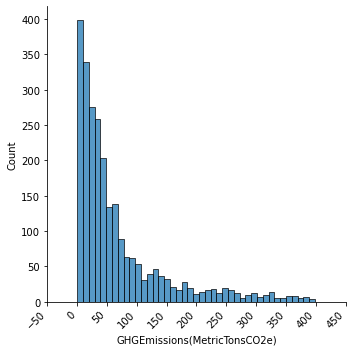

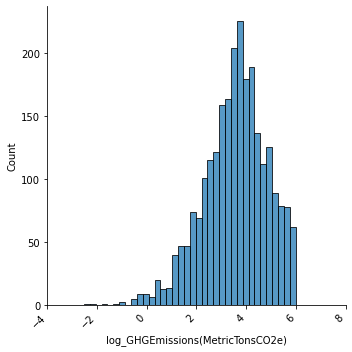

In [533]:
a=sns.displot(data=df_NRJ['GHGEmissions(MetricTonsCO2e)'])
a.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()

a=sns.displot(data=df_NRJ['log_GHGEmissions(MetricTonsCO2e)'])
a.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [534]:
df_NRJ.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'ComplianceStatus', 'GHGEmissions(MetricTonsCO2e)', 'ThirdLargestPropertyUseTypeGFA', 'Electricity', 'Steam', 'NaturalGas', 'Campus', 'SPS-District K-12', 'BALLARD', 'CENTRAL', 'DELRIDGE', 'DOWNTOWN', 'EAST', 'GREATER DUWAMISH', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'NORTH', 'NORTHEAST', 'NORTHWEST', 'SOUTHEAST', 'SOUTHWEST', 'CouncilDistrictCode_1', 'CouncilDistrictCode_2', 'CouncilDistrictCode_3', 'CouncilDistrictCode_4', 'CouncilDistrictCode_5', 'CouncilDistrictCode_6', 'CouncilDistrictCode_7', '1900_1909', '1910_1919', '1920_1929', '1930_1939', '1940_1949', '1950_1959', '1960_1969', '1970_1979', '1980_1989', '1990_1999', '2000_2009', '2010_2019', 'College/University', 'Distribution Center', 'Hospital',


In [65]:
# Modèle sans Nan, avec les valeurs CO2 négatives. Sans log ni std.


df_NRJ_NoNan=df_NRJ_initial[~df_NRJ_initial['GHGEmissions(MetricTonsCO2e)'].isna()]

X_DR = df_NRJ_NoNan[xtrain_columns_V2]
y_DR = df_NRJ_NoNan['GHGEmissions(MetricTonsCO2e)']


In [66]:


X_train_DR, X_test_DR, y_train_DR, y_test_DR = train_test_split(X_DR, y_DR, random_state=0)


dummy_regr = DummyRegressor(strategy="mean")


start_time = timeit.default_timer()

dummy_regr.fit(X_train_DR, y_train_DR)

elapsed = timeit.default_timer() - start_time

print(elapsed)

y_predict_DR=dummy_regr.predict(X_test_DR)


0.0004007999999657841


In [130]:

# R2 :
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test_DR, y_predict_DR)))

r2_score (dummy mean): -0.00


In [131]:
# RMSE : 

print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test_DR, y_predict_DR)))


Mean squared error (linear model): 6072.54


In [132]:
# Modèle sans Nan, sans les valeurs CO2 négatives. Avec log et std.

In [68]:
df_NRJ=df_NRJ[df_NRJ['GHGEmissions(MetricTonsCO2e)']>0]


df_NRJ_NoNan=df_NRJ[~df_NRJ['log_GHGEmissions(MetricTonsCO2e)'].isna()]


X_DR = df_NRJ_NoNan[xtrain_columns_V2]


from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_DR)
X_DR_std = std_scale.transform(X_DR)

abc=list(df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)'])

data_std=pd.DataFrame(X_DR_std,columns=xtrain_columns_V2)

data_std=data_std.assign(logGHGEmissions=df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)'])



In [69]:
data_std['logGHGEmissions'].isna().sum()

4

In [71]:
data_std=data_std[~data_std['logGHGEmissions'].isna()]


X_std_DR = data_std[xtrain_columns_V2]
y_log_DR = data_std['logGHGEmissions']

X_train_std_DR, X_test_std_DR, y_train_log_DR, y_test_log_DR = train_test_split(X_std_DR, y_log_DR, random_state=0)


dummy_regr = DummyRegressor(strategy="mean")

start_time = timeit.default_timer()

dummy_regr.fit(X_train_std_DR, y_train_log_DR)

elapsed = timeit.default_timer() - start_time

print(elapsed)

y_log_predict_DR=dummy_regr.predict(X_test_std_DR)

0.0005333999999947991


In [136]:

# R2 :
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test_log_DR, y_log_predict_DR)))

# RMSE : 
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test_log_DR, y_log_predict_DR)))



r2_score (dummy mean): -0.01
Mean squared error (linear model): 1.81


In [543]:
# score R2 proche de 0. RMSE a diminué cependant. 

## Linear Regression --> ok

In [544]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [137]:
# faire un modèle avec tout le df sans passage au log :


mod = sm.regression.linear_model.OLS.from_formula(
    formula='Q("GHGEmissions(MetricTonsCO2e)") ~ NumberofBuildings+NumberofFloors+PropertyGFATotal+Electricity+Steam+NaturalGas+Campus+Q("Multifamily HR (10+)")+Q("Multifamily LR (1-4)")+Q("Multifamily MR (5-9)")+NonResidential+Q("Nonresidential COS")+Q("Nonresidential WA")+Q("SPS-District K-12")+BALLARD+Ballard+CENTRAL+Central+DELRIDGE+Q("DELRIDGE NEIGHBORHOODS")+DOWNTOWN+Delridge+EAST+Q("GREATER DUWAMISH")+Q("LAKE UNION")+Q("MAGNOLIA / QUEEN ANNE")+NORTH+NORTHEAST+NORTHWEST+North+Northwest+SOUTHEAST+SOUTHWEST+CouncilDistrictCode_1+CouncilDistrictCode_2+CouncilDistrictCode_3+CouncilDistrictCode_4+CouncilDistrictCode_5+CouncilDistrictCode_6+CouncilDistrictCode_7+Q("1900_1909")+Q("1910_1919")+Q("1920_1929")+Q("1930_1939")+Q("1940_1949")+Q("1950_1959")+Q("1960_1969")+Q("1970_1979")+Q("1980_1989")+Q("1990_1999")+Q("2000_2009")+Q("2010_2019")',
                                     data=df_NRJ_initial)

res=mod.fit()

print(res.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Q("GHGEmissions(MetricTonsCO2e)")   R-squared:                       0.337
Model:                                           OLS   Adj. R-squared:                  0.332
Method:                                Least Squares   F-statistic:                     68.55
Date:                               Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                                       10:44:56   Log-Likelihood:                -48352.
No. Observations:                               6537   AIC:                         9.680e+04
Df Residuals:                                   6488   BIC:                         9.713e+04
Df Model:                                         48                                         
Covariance Type:                           nonrobust                                         
                                  coef    std err          t

In [138]:


# faire un modèle avec suppression des valeurs négatives des émissions du CO2 et passage au log de cette variable



df_NRJ=df_NRJ[df_NRJ['GHGEmissions(MetricTonsCO2e)']>0]


df_NRJ_NoNan=df_NRJ[~df_NRJ['log_GHGEmissions(MetricTonsCO2e)'].isna()]

mod = sm.regression.linear_model.OLS.from_formula(
    formula='Q("log_GHGEmissions(MetricTonsCO2e)") ~ NumberofBuildings+NumberofFloors+PropertyGFATotal+Electricity+Steam+NaturalGas+Campus+Q("Multifamily HR (10+)")+Q("Multifamily LR (1-4)")+Q("Multifamily MR (5-9)")+NonResidential+Q("Nonresidential COS")+Q("Nonresidential WA")+Q("SPS-District K-12")+BALLARD+Ballard+CENTRAL+Central+DELRIDGE+Q("DELRIDGE NEIGHBORHOODS")+DOWNTOWN+Delridge+EAST+Q("GREATER DUWAMISH")+Q("LAKE UNION")+Q("MAGNOLIA / QUEEN ANNE")+NORTH+NORTHEAST+NORTHWEST+North+Northwest+SOUTHEAST+SOUTHWEST+CouncilDistrictCode_1+CouncilDistrictCode_2+CouncilDistrictCode_3+CouncilDistrictCode_4+CouncilDistrictCode_5+CouncilDistrictCode_6+CouncilDistrictCode_7+Q("1900_1909")+Q("1910_1919")+Q("1920_1929")+Q("1930_1939")+Q("1940_1949")+Q("1950_1959")+Q("1960_1969")+Q("1970_1979")+Q("1980_1989")+Q("1990_1999")+Q("2000_2009")+Q("2010_2019")',
                                     data=df_NRJ_NoNan)

res=mod.fit()

print(res.summary())




                                      OLS Regression Results                                     
Dep. Variable:     Q("log_GHGEmissions(MetricTonsCO2e)")   R-squared:                       0.533
Model:                                               OLS   Adj. R-squared:                  0.529
Method:                                    Least Squares   F-statistic:                     157.3
Date:                                   Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                                           10:44:56   Log-Likelihood:                -9430.4
No. Observations:                                   6532   AIC:                         1.896e+04
Df Residuals:                                       6484   BIC:                         1.928e+04
Df Model:                                             47                                         
Covariance Type:                               nonrobust                                         
                    

In [139]:
# faire un modèle centré réduit + passage au log.

In [545]:
X_LR = df_NRJ_NoNan[xtrain_columns_V2]

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_LR)
X_LR_std = std_scale.transform(X_LR)

abc=list(df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)'])

data_std=pd.DataFrame(X_LR_std,columns=xtrain_columns_V2)

data_std=data_std.assign(logGHGEmissions=df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)'])

In [546]:
data_std

NumberofBuildings  NumberofFloors  PropertyGFATotal  Electricity     Steam  NaturalGas  SPS-District K-12   BALLARD   CENTRAL  DELRIDGE  DOWNTOWN      EAST  GREATER DUWAMISH  LAKE UNION  MAGNOLIA / QUEEN ANNE     NORTH  NORTHEAST  NORTHWEST  SOUTHEAST  SOUTHWEST  1900_1909  1910_1919  1920_1929  1930_1939  1940_1949  1950_1959  1960_1969  1970_1979  1980_1989  1990_1999  2000_2009  2010_2019  College/University  Distribution Center  Hospital     Hotel  K_12 School  Laboratory  Large Office  Low-Rise Multifamily  Medical Office  Mixed Use Property  Non-Refrigerated Warehouse     Other  Refrigerated Warehouse  Residence Hall/Dormitory  Restaurant  Retail Store  Self_Storage Facility  Senior Care Community  Small- and Mid-Sized Office  Supermarket_Grocery Store  Warehouse  Worship Facility  logGHGEmissions
0             -0.027591        3.662754          0.494437     0.564437 -0.098374   -0.549665                0.0 -0.213334 -0.176922 -0.164534  2.012060 -0.275796         -0.552129   -0.315741              -0.322578 -0.198584  -0.288987  -0.238718    -0.1398  -0.158017  -0.321823  -0.293827   2.944139  -0.189724  -0.210246  -0.341848  -0.409104  -0.344755   -0.33007  -0.295428  -0.318791  -0.147050           -0.104404            -0.200746 -0.028273  4.733061    -0.178119   -0.034634     -0.279966             -0.028273       -0.148461            -0.26903                   -0.277469 -0.377274               -0.100423                 -0.119062   -0.087441     -0.271581              -0.151248              -0.106342                    -0.544120                  -0.172062  -0.274116         -0.242433         5.519178
1             -0.027591        3.257203          0.781940    -1.771678 -0.098374    1.819289                0.0 -0.213334 -0.176922 -0.164534  2.012060 -0.275796         -0.552129   -0.315741              -0.322578 -0.198584  -0.288987  -0.238718    -0.1398  -0.158017  -0.321823  -0.293827  -0.339658  -0.189724  -0.210246  -0.341848  -0.409104  -0.344755   -0.33007   3.384924  -0.318791  -0.147050           -0.104404            -0.200746 -0.028273  4.733061    -0.178119   -0.034634     -0.279966             -0.028273       -0.148461            -0.26903                   -0.277469 -0.377274               -0.100423                 -0.119062   -0.087441     -0.271581              -0.151248              -0.106342                    -0.544120                  -0.172062  -0.274116         -0.242433         5.574091
2             -0.027591        3.257203          0.391345    -1.771678 -0.098374    1.819289                0.0 -0.213334 -0.176922 -0.164534  2.012060 -0.275796         -0.552129   -0.315741              -0.322578 -0.198584  -0.288987  -0.238718    -0.1398  -0.158017  -0.321823  -0.293827   2.944139  -0.189724  -0.210246  -0.341848  -0.409104  -0.344755   -0.33007  -0.295428  -0.318791  -0.147050           -0.104404            -0.200746 -0.028273  4.733061    -0.178119   -0.034634     -0.279966             -0.028273       -0.148461            -0.26903                   -0.277469 -0.377274               -0.100423                 -0.119062   -0.087441     -0.271581              -0.151248              -0.106342                    -0.544120                  -0.172062  -0.274116         -0.242433         5.339747
3             -0.027591        2.040550          0.766645     0.564437 -0.098374   -0.549665                0.0 -0.213334 -0.176922 -0.164534  2.012060 -0.275796         -0.552129   -0.315741              -0.322578 -0.198584  -0.288987  -0.238718    -0.1398  -0.158017  -0.321823  -0.293827   2.944139  -0.189724  -0.210246  -0.341848  -0.409104  -0.344755   -0.33007  -0.295428  -0.318791  -0.147050           -0.104404            -0.200746 -0.028273 -0.211280    -0.178119   -0.034634     -0.279966             -0.028273       -0.148461            -0.26903                   -0.277469  2.650593               -0.100423                 -0.119062   -0.087441     -0.271581              -0.151248              -0.106342    

In [551]:
xtrain_columns_V2

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'Electricity',
 'Steam',
 'NaturalGas',
 'SPS-District K-12',
 'BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019',
 'College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K_12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self_Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket_Grocery Store',
 'Warehouse',
 'Worship Facility']

In [72]:

df_NRJ_NoNan=df_NRJ[~df_NRJ['log_GHGEmissions(MetricTonsCO2e)'].isna()]

mod = sm.regression.linear_model.OLS.from_formula(
    formula= 'logGHGEmissions ~ log_NumberofFloors+log_PropertyGFATotal+Electricity+Steam+NaturalGas+BALLARD+CENTRAL+DELRIDGE+DOWNTOWN+EAST+Q("GREATER DUWAMISH")+Q("LAKE UNION")+Q("MAGNOLIA / QUEEN ANNE")+NORTH+NORTHEAST+NORTHWEST+SOUTHEAST+SOUTHWEST+Q("1900_1909")+Q("1910_1919")+Q("1920_1929")+Q("1930_1939")+Q("1940_1949")+Q("1950_1959")+Q("1960_1969")+Q("1970_1979")+Q("1980_1989")+Q("1990_1999")+Q("2000_2009")+Q("2010_2019")+Q("College/University")+Q("Distribution Center")+Hospital+Hotel+Q("K_12 School")+Laboratory+Q("Large Office")+Q("Low-Rise Multifamily")+Q("Medical Office")+Q("Mixed Use Property")+Other+Q("Residence Hall/Dormitory")+Restaurant+Q("Retail Store")+Q("Self_Storage Facility")+Q("Senior Care Community")+Q("Small- and Mid-Sized Office")+Q("Supermarket_Grocery Store")+Warehouse+Q("Worship Facility")',
    #formula='logGHGEmissions ~ NumberofBuildings+NumberofFloors+PropertyGFATotal+Electricity+Steam+NaturalGas+Campus+Q("Multifamily HR (10+)")+Q("Multifamily LR (1-4)")+Q("Multifamily MR (5-9)")+NonResidential+Q("Nonresidential COS")+Q("Nonresidential WA")+Q("SPS-District K-12")+BALLARD+Ballard+CENTRAL+Central+DELRIDGE+Q("DELRIDGE NEIGHBORHOODS")+DOWNTOWN+Delridge+EAST+Q("GREATER DUWAMISH")+Q("LAKE UNION")+Q("MAGNOLIA / QUEEN ANNE")+NORTH+NORTHEAST+NORTHWEST+North+Northwest+SOUTHEAST+SOUTHWEST+CouncilDistrictCode_1+CouncilDistrictCode_2+CouncilDistrictCode_3+CouncilDistrictCode_4+CouncilDistrictCode_5+CouncilDistrictCode_6+CouncilDistrictCode_7+Q("1900_1909")+Q("1910_1919")+Q("1920_1929")+Q("1930_1939")+Q("1940_1949")+Q("1950_1959")+Q("1960_1969")+Q("1970_1979")+Q("1980_1989")+Q("1990_1999")+Q("2000_2009")+Q("2010_2019")',
                                     data=data_std)

start_time = timeit.default_timer()

res=mod.fit()

elapsed = timeit.default_timer() - start_time

print(elapsed)

print(res.summary())

0.06396150000000489
                            OLS Regression Results                            
Dep. Variable:        logGHGEmissions   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.177
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           3.62e-26
Time:                        14:42:48   Log-Likelihood:                -4059.5
No. Observations:                2497   AIC:                             8213.
Df Residuals:                    2450   BIC:                             8487.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


---> quoique l'on fasse, la p-value reste nettement supérieur à 1.

Le modèle n'est pas significatif dans son ensemble, même si quelques variables sont pertinentes pour l'étude.

## Régression Ridge à noyau --> ok

In [144]:
df_NRJ.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType        Address  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  YearBuilt  log_GHGEmissions(MetricTonsCO2e)  NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu) ComplianceStatus  GHGEmissions(MetricTonsCO2e)  Electricity  Steam  NaturalGas  Campus  Multifamily HR (10+)  Multifamily LR (1-4)  Multifamily MR (5-9)  NonResidential  Nonresidential COS  Nonresidential WA  SPS-District K-12  BALLARD  Ballard  CENTRAL  Central  DELRIDGE  DELRIDGE NEIGHBORHOODS  DOWNTOWN  Delridge  EAST  GREATER DUWAMISH  LAKE UNION  MAGNOLIA / QUEEN ANNE  NORTH  NORTHEAST  NORTHWEST  North  Northwest  SOUTHEAST  SOUTHWEST  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7  1900_1909  1910_1919  1920_1929  1930_1939  1940_1949  1950_1959  1960_1969  1970_1979  1980_1989  \
0              1      2015  NonResidential               Hotel  405 olive way  98101.0                     659000030                    7     DOWNTOWN       1927                          5.519178                1.0            12.0             88434             65.0            6981428.0        Compliant                        249.43            1      0           0       0                     0                     0                     0               1                   0                  0                  0        0        0        0        0         0                       0         1         0     0                 0           0                      0      0          0          0      0          0          0          0                      0                      0                      0                      0                      0                      0                      1          0          0          1          0          0          0          0          0          0   
1              2      2015  NonResidential               Hotel    724 pine st  98101.0                     659000220                    7     DOWNTOWN       1996                          5.574091                1.0            11.0            103566             51.0            8354235.0        Compliant                        263.51            0      0           1       0                     0                     0                     0               1                   0                  0                  0        0        0        0        0         0                       0         1         0     0                 0           0                      0      0          0          0      0          0          0          0                      0                      0                      0                      0                      0                      0                      1          0          0          0          0          0          0          0          0          0   

   1990_1999  2000_2009  2010_2019  
0          0          0          0  
1          1          0          0

In [47]:

df_NRJ_NoNan=df_NRJ[~df_NRJ['GHGEmissions(MetricTonsCO2e)'].isna()]

X_Ridge = df_NRJ_NoNan[xtrain_columns_V2]
y_Ridge = df_NRJ_NoNan['GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_Ridge, X_test_Ridge, y_train_Ridge, y_test_Ridge = \
    model_selection.train_test_split(X_Ridge, y_Ridge, test_size=0.3)

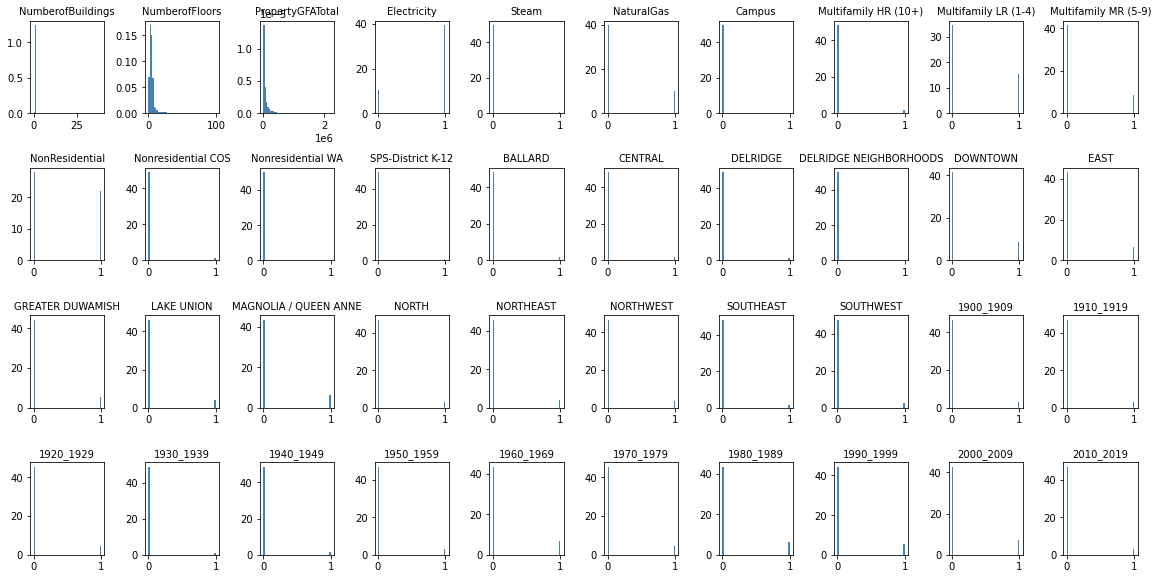

In [51]:
#besoin de standardiser ??

fig = plt.figure(figsize=(16, 12))
i=0
for col in X_Ridge.columns:
    ax = fig.add_subplot(6,10, i+1)
    h = ax.hist(X_Ridge[col][:], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(col, fontsize=10)
    i=i+1
fig.tight_layout()


# --> Yes / deux premières colonnes ?????



In [52]:
# standardiser les données
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train_Ridge)
X_train_Ridge_std = std_scale.transform(X_train_Ridge)
X_test_Ridge_std = std_scale.transform(X_test_Ridge)

X_Ridge_std=std_scale.transform(X_Ridge)

In [53]:
X_Ridge_std

array([[-0.07152865,  1.28978742, -0.0170721 , ..., -0.35711114,
        -0.41406586, -0.25251815],
       [-0.07152865,  1.11165054,  0.08452507, ...,  2.80024868,
        -0.41406586, -0.25251815],
       [-0.07152865,  6.45575704,  5.84803614, ..., -0.35711114,
        -0.41406586, -0.25251815],
       ...,
       [-0.07152865, -0.6697183 , -0.52248647, ..., -0.35711114,
        -0.41406586, -0.25251815],
       [-0.07152865, -0.6697183 , -0.51614839, ..., -0.35711114,
        -0.41406586, -0.25251815],
       [-0.07152865, -0.6697183 , -0.48823804, ..., -0.35711114,
        -0.41406586, -0.25251815]])

In [770]:
df_std=pd.DataFrame(X_Ridge_std,columns=xtrain_columns_V2)

In [775]:
df_NRJ.describe()

OSEBuildingID     DataYear       ZipCode  CouncilDistrictCode    YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu)  GHGEmissions(MetricTonsCO2e)  ThirdLargestPropertyUseTypeGFA  Electricity        Steam   NaturalGas      BALLARD      CENTRAL     DELRIDGE     DOWNTOWN         EAST  GREATER DUWAMISH   LAKE UNION  MAGNOLIA / QUEEN ANNE        NORTH    NORTHEAST    NORTHWEST    SOUTHEAST    SOUTHWEST  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7       Decade    1900_1909    1910_1919    1920_1929    1930_1939    1940_1949    1950_1959    1960_1969    1970_1979    1980_1989    1990_1999    2000_2009    2010_2019  College/University  Distribution Center     Hospital        Hotel  K_12 School   Laboratory  Large Office  Low-Rise Multifamily  Medical Office  Mixed Use Property        Other  Residence Hall/Dormitory  \
count    2508.000000  2508.000000   2508.000000          2508.000000  2508.000000        2508.000000     2508.000000       2508.000000      1714.000000         2.508000e+03                   2508.000000                     1234.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000       2508.000000  2508.000000            2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000            2508.000000            2508.000000            2508.000000            2508.000000            2508.000000            2508.000000            2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000         2508.000000          2508.000000  2508.000000  2508.000000  2508.000000  2508.000000   2508.000000           2508.000000     2508.000000         2508.000000  2508.000000               2508.000000   
mean    16985.303030  2015.492026  98117.165869             4.287480  1957.863238           1.007974        2.978070      62463.786284        62.586348         3.416509e+06                     67.904617                     1293.532658     0.757177     0.009569     0.231659     0.043461     0.030702     0.026316     0.198565     0.070574          0.233254     0.090510               0.094498     0.037879     0.076954     0.053828     0.019139     0.024322               0.070574               0.257177               0.112041               0.107257               0.079745               0.073764               0.299442    53.520734     0.093700     0.079346     0.104067     0.034689     0.042265     0.104466     0.143142     0.106061     0.098086     0.080144     0.092504     0.021531            0.010766             0.038676     0.000797     0.042663     0.030702     0.001196      0.072967              0.000797        0.021531            0.067384     0.124402                  0.013955   
std     12227.049109     0.500036     17.316627             2.182876    32.570883           0.289313        2.511703      52691.636353        28.792530         3.549765e+06                     79.464548                     4285.180214     0.428874     0.097373     0.421976     0.203933     0.172543     0.160105     0.398999     0.256163          0.422987     0.286969               0.292578     0.190941     0.266571     0.225722     0.137040     0.154078               0.256163               0.437165               0.315480               0.309501               0.270952               0.261438               0.458105    32.295578     0.291469     0.270332     0.305408     0.183027     0.201233     0.305925     0.350287     0.307977     0.297490     0.271569     0.289794     0.145175            0.103218             0.192861     0.028233     0.202138     0.172543     0.034572      0.260133              0.028233        0.145175            0.250736     0.330105                  0.117329   
min         1.000000  2015.

In [772]:
df_std.describe()

NumberofBuildings  NumberofFloors  PropertyGFATotal  Electricity        Steam   NaturalGas  SPS-District K-12      BALLARD      CENTRAL     DELRIDGE     DOWNTOWN         EAST  GREATER DUWAMISH   LAKE UNION  MAGNOLIA / QUEEN ANNE        NORTH    NORTHEAST    NORTHWEST    SOUTHEAST    SOUTHWEST    1900_1909    1910_1919    1920_1929    1930_1939    1940_1949    1950_1959    1960_1969    1970_1979    1980_1989    1990_1999    2000_2009    2010_2019  College/University  Distribution Center     Hospital        Hotel  K_12 School   Laboratory  Large Office  Low-Rise Multifamily  Medical Office  Mixed Use Property  Non-Refrigerated Warehouse        Other  Refrigerated Warehouse  Residence Hall/Dormitory   Restaurant  Retail Store  Self_Storage Facility  Senior Care Community  Small- and Mid-Sized Office  Supermarket_Grocery Store    Warehouse  Worship Facility
count        2504.000000     2504.000000       2504.000000  2504.000000  2504.000000  2504.000000             2504.0  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000       2504.000000  2504.000000            2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000  2504.000000         2504.000000          2504.000000  2504.000000  2504.000000  2504.000000  2504.000000   2504.000000           2504.000000     2504.000000         2504.000000                 2504.000000  2504.000000             2504.000000               2504.000000  2504.000000   2504.000000            2504.000000            2504.000000                  2504.000000                2504.000000  2504.000000       2504.000000
mean           -0.001971        0.016010          0.003925     0.014139    -0.006836    -0.012724                0.0     0.021320     0.007387     0.007948    -0.004223     0.030093         -0.008970    -0.013979               0.008150    -0.004522     0.002230    -0.013638    -0.001718    -0.018600    -0.001124     0.024645    -0.005181    -0.021063     0.003331    -0.019433    -0.006174     0.011496    -0.011106     0.016455     0.007226     0.004358            0.024108            -0.003319    -0.010153     0.005329     0.009762     0.001674      0.009700              0.009544        0.003107            0.005156                   -0.001673    -0.018118               -0.008310                 -0.015981    -0.016237      0.026809               0.000705              -0.007390                     0.015405                  -0.005459    -0.007856         -0.027752
std             0.993288        1.021416          1.019063     0.991800     0.966401     0.992235                0.0     1.049267     1.020658     1.024012     0.997014     1.052339          0.994608     0.980563               1.011617     0.989330     1.003745     0.973713     0.994192     0.944621     0.998636     1.039562     0.993488     0.948329     1.007807     0.975597     0.993954     1.015067     0.985380     1.026082     1.010461     1.014813            1.121207             0.992302     0.836780     1.012338     1.027140     1.024637      1.016343              1.183047        1.010493            1.009143                    0.997422     0.979978                0.960105                  0.936340     0.912413      1.047329               1.002479               0.966457                     1.010335                   0.984937     0.987063          0.948151
min            -3.459900       -1.213385         -0.888682    -1.742661    -0.101885    -0.558012                0.0    -0.202480    -0.173154    -0.160503    -0.499643    -0.260080         -0.558012    -0.323521              -0.318110    -0.200948    -0.287782    -0.246034    -0.140679    -0.167836    -0.322443    -0.280745    -0.342559    -0.200948    -0.208514    -0.352872    -0.412723    -0.338384    -0.336285    -0.286617    -0.314836    -0.144841           -0.092928            -0.202480    -0.033806    -

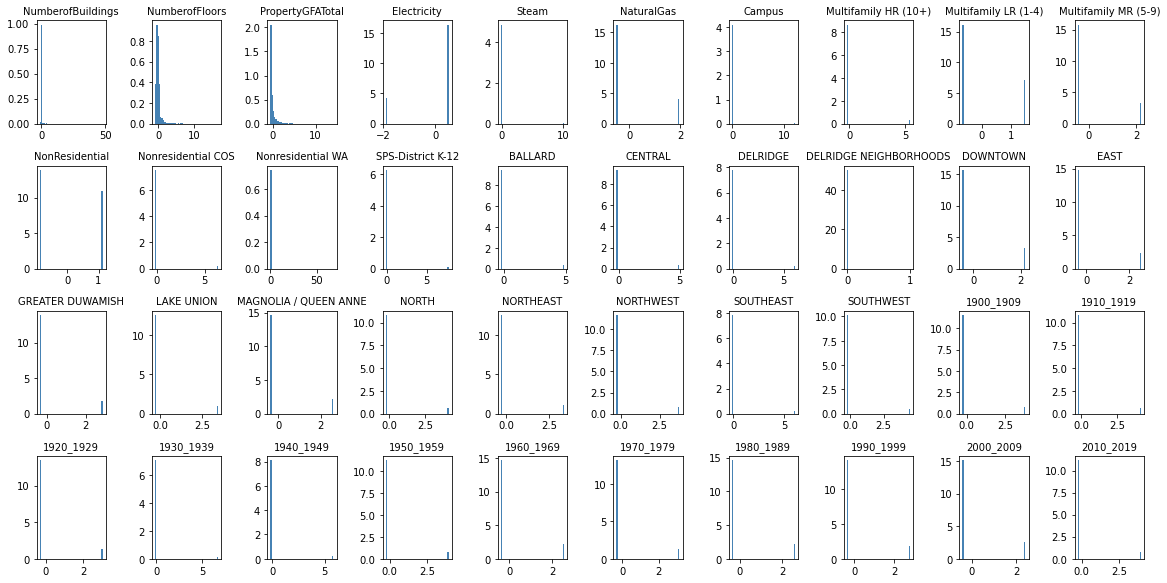

In [54]:

fig = plt.figure(figsize=(16, 12))

for feat_idx in range(X_Ridge_std.shape[1]):
    ax = fig.add_subplot(6,10, (feat_idx+1))
    h = ax.hist(X_Ridge_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(X_Ridge.columns[feat_idx], fontsize=10)
    
fig.tight_layout()

In [55]:
# Nous pouvons maintenant entraîner une kRR (regress ridge à noyau) sur le jeu d'entraînement en utilisant des paramètres 
# par défaut pour le paramètre de régularisation et la bande passante du noyau RBF gaussien :

import numpy as np

from sklearn import kernel_ridge
predicteur_Ridge = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur_Ridge.fit(X_train_Ridge_std, y_train_Ridge)

# prédire sur le jeu de test
y_test_Ridge_pred = predicteur_Ridge.predict(X_test_Ridge_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 251.35


In [56]:
#predicteur_Ridge.best_params_

In [57]:
from sklearn.metrics import r2_score

print(r2_score(y_test_Ridge, y_test_Ridge_pred))





0.38025614839271993


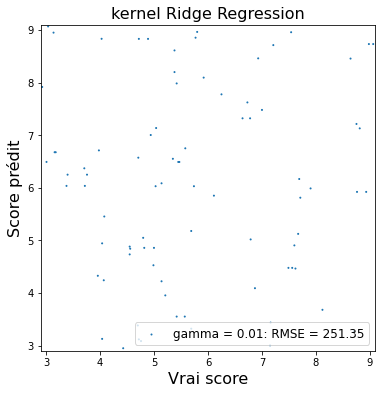

In [58]:

from matplotlib import pyplot as plt

# créer une figure

fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test_Ridge), list(y_test_Ridge_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([2.9, 9.1])
plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

In [59]:
y_test_Ridge_pred
df_visualisation=pd.DataFrame(y_test_Ridge_pred)

In [60]:
y_test_Ridge2=y_test_Ridge.reset_index()

In [61]:
y_test_Ridge2.drop('index',axis='columns',inplace=True)

In [160]:
start_time = timeit.default_timer()

# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred_Ridge = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred_Ridge.fit(X_train_Ridge_std, y_train_Ridge)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_Ridge_pred_cv = grid_pred_Ridge.predict(X_test_Ridge_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred_cv))


elapsed = timeit.default_timer() - start_time

print(elapsed)



In [161]:
grid_pred_Ridge.best_params_

{'alpha': 1.0, 'gamma': 0.01}

In [162]:
rmse_cv

377.8673540253454

In [163]:
print(r2_score(y_test_Ridge, y_test_Ridge_pred))

0.4396064878268354


In [164]:
print(r2_score(y_test_Ridge, y_test_Ridge_pred_cv))


0.4396064878268354


In [165]:
rmse = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred))


In [166]:
rmse

377.8673540253454

##### RMSE : 

In [167]:
metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred)

142783.73723811572

In [168]:
metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred_cv)

142783.73723811572

In [169]:
#### Montrer la distribution de y
#### Chercher des metrics pour gérer l'assymétrie (on doit passer au log à partir de telle valeur de skewness)
#### Mettre au log la variable de sortie pour diminuer l'assymétrie

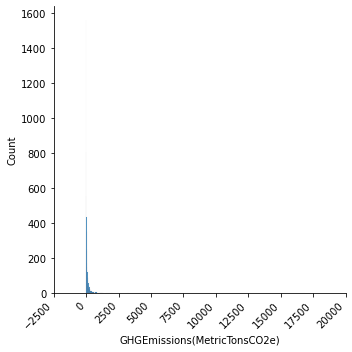

In [170]:
a=sns.displot(data=df_NRJ['GHGEmissions(MetricTonsCO2e)'])
a.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [171]:
df_NRJ['GHGEmissions(MetricTonsCO2e)'].describe()

count     6532.000000
mean       116.127936
std        484.567028
min          0.080000
25%          9.487500
50%         33.225000
75%         92.002500
max      16870.980000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [172]:
# suppression des émisssions de CO2 négatifs

# df_NRJ=df_NRJ[df_NRJ['GHGEmissions(MetricTonsCO2e)']>0]

In [173]:
df_NRJ['GHGEmissions(MetricTonsCO2e)'].describe()

count     6532.000000
mean       116.127936
std        484.567028
min          0.080000
25%          9.487500
50%         33.225000
75%         92.002500
max      16870.980000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [174]:
df_NRJ.isna().sum()

OSEBuildingID                          0
DataYear                               0
BuildingType                           0
PrimaryPropertyType                    0
Address                                0
ZipCode                               13
TaxParcelIdentificationNumber          2
CouncilDistrictCode                    0
Neighborhood                           0
YearBuilt                              0
log_GHGEmissions(MetricTonsCO2e)       0
NumberofBuildings                      0
NumberofFloors                         0
PropertyGFATotal                       0
ENERGYSTARScore                     1576
SiteEnergyUse(kBtu)                    0
ComplianceStatus                       0
GHGEmissions(MetricTonsCO2e)           0
Electricity                            0
Steam                                  0
NaturalGas                             0
Campus                                 0
Multifamily HR (10+)                   0
Multifamily LR (1-4)                   0
Multifamily MR (

#### Passage au log de y :

In [141]:
#df_NRJ['log_GHGEmissions(MetricTonsCO2e)']=np.log(df_NRJ['GHGEmissions(MetricTonsCO2e)'])

In [75]:


df_NRJ_NoNan=df_NRJ[~df_NRJ['log_GHGEmissions(MetricTonsCO2e)'].isna()]

X_Ridge = df_NRJ_NoNan[xtrain_columns_V2]
y_Ridge = df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_Ridge, X_test_Ridge, y_train_Ridge, y_test_Ridge = \
    model_selection.train_test_split(X_Ridge, y_Ridge, test_size=0.3)

std_scale = preprocessing.StandardScaler().fit(X_train_Ridge)
X_train_Ridge_std = std_scale.transform(X_train_Ridge)
X_test_Ridge_std = std_scale.transform(X_test_Ridge)

X_Ridge_std=std_scale.transform(X_Ridge)

In [77]:
from sklearn import kernel_ridge
predicteur_Ridge = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur_Ridge.fit(X_train_Ridge_std, y_train_Ridge)

# prédire sur le jeu de test
y_test_Ridge_pred = predicteur_Ridge.predict(X_test_Ridge_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.86


In [145]:
print("R2 : "+str(r2_score(y_test_Ridge, y_test_Ridge_pred)))

R2 : 0.5517012979258118


In [560]:
# CV

In [146]:
start_time = timeit.default_timer()


# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred_Ridge_log = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred_Ridge_log.fit(X_train_Ridge_std, y_train_Ridge)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_Ridge_pred_cv = grid_pred_Ridge_log.predict(X_test_Ridge_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred_cv))


elapsed = timeit.default_timer() - start_time

print(elapsed)

14.47433809999984


In [147]:
grid_pred_Ridge_log.best_params_

{'alpha': 0.1, 'gamma': 0.01}

In [148]:
# R2 : 
#print("R2 : "+str(r2_score(y_test_Ridge, y_test_Ridge_pred_cv)))


In [149]:
#print("RMSE: {:.2f}".format(rmse_cv))

In [78]:
Ridge_opt=kernel_ridge.KernelRidge(kernel='rbf',alpha=0.01,gamma=0.01)

start_time = timeit.default_timer()

Ridge_opt.fit(X_train_Ridge_std, y_train_Ridge)

elapsed = timeit.default_timer() - start_time

print(elapsed)

pred_Ridge_opt=Ridge_opt.predict(X_test_Ridge_std)
score_RMSE_Ridge_opt=mean_squared_error(y_test_Ridge,pred_Ridge_opt)
score_R2_Ridge_opt=Ridge_opt.score(X_test_Ridge_std, y_test_Ridge)

0.14704229999995277


In [152]:
score_RMSE_Ridge_opt

0.6111317861778773

In [153]:
score_R2_Ridge_opt

0.6264284319880162

In [159]:
## optimisation des features :
# recherche des features importantes pour améliorer le score

from sklearn.inspection import permutation_importance
r = permutation_importance(Ridge_opt, X_test_Ridge_std, y_test_Ridge,
                         n_repeats=30,
                            random_state=0)

r.importances_mean.argsort()[::-1]

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_NRJ_train.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print("'"+f"{df_NRJ_train.columns[i]:<8}"+"',")


log_PropertyGFATotal0.525 +/- 0.036
Warehouse0.253 +/- 0.018
log_NumberofFloors0.141 +/- 0.015
Self_Storage Facility0.104 +/- 0.014
Electricity0.095 +/- 0.013
Supermarket_Grocery Store0.073 +/- 0.009
NaturalGas0.071 +/- 0.012
DOWNTOWN0.067 +/- 0.008
Small- and Mid-Sized Office0.067 +/- 0.010
2000_20090.065 +/- 0.006
GREATER DUWAMISH0.053 +/- 0.008
MAGNOLIA / QUEEN ANNE0.052 +/- 0.007
1980_19890.051 +/- 0.007
Retail Store0.051 +/- 0.010
Distribution Center0.049 +/- 0.006
1900_19090.046 +/- 0.009
Other   0.040 +/- 0.007
1910_19190.038 +/- 0.008
Mixed Use Property0.038 +/- 0.006
EAST    0.038 +/- 0.006
Large Office0.037 +/- 0.007
1940_19490.035 +/- 0.008
1970_19790.035 +/- 0.008
1920_19290.032 +/- 0.006
1990_19990.032 +/- 0.007
Worship Facility0.031 +/- 0.007
2010_20190.031 +/- 0.010
BALLARD 0.031 +/- 0.006
NORTHEAST0.027 +/- 0.005
LAKE UNION0.027 +/- 0.004
NORTHWEST0.027 +/- 0.006
1950_19590.026 +/- 0.006
1930_19390.024 +/- 0.006
CENTRAL 0.019 +/- 0.006
1960_19690.018 +/- 0.005
SOUTHEAST

In [160]:
x_opt=['log_PropertyGFATotal',
'Warehouse',
'log_NumberofFloors',
'Self_Storage Facility',
'Electricity',
'Supermarket_Grocery Store',
'NaturalGas',
'DOWNTOWN',
'Small- and Mid-Sized Office',
'2000_2009']

In [161]:
df_NRJ_NoNan=df_NRJ[~df_NRJ['log_GHGEmissions(MetricTonsCO2e)'].isna()]

X_Ridge = df_NRJ_NoNan[x_opt]
y_Ridge = df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_Ridge, X_test_Ridge, y_train_Ridge, y_test_Ridge = \
    model_selection.train_test_split(X_Ridge, y_Ridge, test_size=0.3)

std_scale = preprocessing.StandardScaler().fit(X_train_Ridge)
X_train_Ridge_std = std_scale.transform(X_train_Ridge)
X_test_Ridge_std = std_scale.transform(X_test_Ridge)

X_Ridge_std=std_scale.transform(X_Ridge)



In [162]:
start_time = timeit.default_timer()


# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred_Ridge_log = model_selection.GridSearchCV(
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred_Ridge_log.fit(X_train_Ridge_std, y_train_Ridge)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_Ridge_pred_cv = grid_pred_Ridge_log.predict(X_test_Ridge_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred_cv))


elapsed = timeit.default_timer() - start_time

print(elapsed)

11.214798500000143


In [163]:
grid_pred_Ridge_log.best_params_

{'alpha': 0.01, 'gamma': 0.01}

In [164]:
Ridge_opt=kernel_ridge.KernelRidge(kernel='rbf',alpha=0.01,gamma=0.01)
Ridge_opt.fit(X_train_Ridge_std, y_train_Ridge)
pred_Ridge_opt=Ridge_opt.predict(X_test_Ridge_std)
score_RMSE_Ridge_opt=mean_squared_error(y_test_Ridge,pred_Ridge_opt)
score_R2_Ridge_opt=Ridge_opt.score(X_test_Ridge_std, y_test_Ridge)

In [165]:
score_RMSE_Ridge_opt

0.9174771482380775

In [166]:
score_R2_Ridge_opt

0.4347182075347713

## Random Forest   --> ok

In [154]:
# Modèle standardisé en X mais sans passage au log en y

df_NRJ_NoNan=df_NRJ[~df_NRJ['GHGEmissions(MetricTonsCO2e)'].isna()]

X_RF = df_NRJ_NoNan[xtrain_columns_V2]
y_RF = df_NRJ_NoNan['GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_RF, X_test_RF, y_train_RF, y_test_RF = \
    model_selection.train_test_split(X_RF, y_RF, test_size=0.3)

In [82]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, oob_score=True)

In [156]:
std_scale = preprocessing.StandardScaler().fit(X_train_RF)
X_train_RF_std = std_scale.transform(X_train_RF)
X_test_RF_std = std_scale.transform(X_test_RF)

X_RF_std=std_scale.transform(X_RF)

In [157]:
model = rfr.fit(X_train_RF_std, y_train_RF)

In [90]:
pred = rfr.predict(X_test_RF_std)


In [91]:
rfr.score(X_test_RF_std, y_test_RF)

0.6576563188581513

In [92]:
from sklearn import metrics

metrics.r2_score(y_test_RF, pred)

0.6576563188581513

In [93]:
X_RF_std.shape

(2501, 50)

In [94]:
### choix des features

from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfr, prefit=True, threshold=0.01)
X_train_RF2_std = select.transform(X_train_RF_std)
print(X_train_RF2_std.shape)

(1750, 19)


In [95]:
X_test_RF2_std = select.transform(X_test_RF_std)

In [96]:
model = rfr.fit(X_train_RF2_std, y_train_RF)

rfr.score(X_test_RF2_std, y_test_RF)

0.6140417099159123

In [97]:
pred2 = rfr.predict(X_test_RF2_std)

metrics.r2_score(y_test_RF, pred2)

0.6140417099159123

In [98]:


start_time = timeit.default_timer()

model = rfr.fit(X_train_RF2_std, y_train_RF)

rfr.score(X_train_RF2_std, y_train_RF)

elapsed = timeit.default_timer() - start_time

#print(rfc.score)

print(elapsed)

2.422427599999992


In [99]:


start_time = timeit.default_timer()

model = rfr.fit(X_train_RF_std, y_train_RF)

rfr.score(X_train_RF_std, y_train_RF)

elapsed = timeit.default_timer() - start_time

#print(rfc.score)

print(elapsed)

4.022149599999921


ok ce nouveau modèle ne change pas grand chose si ce n'est le temps : 1s de gain avec moins de features.

##### RMSE :

In [100]:
metrics.mean_squared_error(y_test_RF, pred)

2148.9265768948358

In [101]:
metrics.mean_squared_error(y_test_RF, pred2)

2422.6999732205536

In [102]:
# Modèle standardisé en X avec passage au log en y

In [103]:
#df_NRJ['log_GHGEmissions(MetricTonsCO2e)']=np.log(df_NRJ['GHGEmissions(MetricTonsCO2e)'])

In [79]:
X_RF = df_NRJ[xtrain_columns_V2]
y_RF_log = df_NRJ['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_RF, X_test_RF, y_train_RF_log, y_test_RF_log = \
    model_selection.train_test_split(X_RF, y_RF_log, test_size=0.1)

In [80]:
std_scale = preprocessing.StandardScaler().fit(X_train_RF)
X_train_RF_std = std_scale.transform(X_train_RF)
X_test_RF_std = std_scale.transform(X_test_RF)

X_RF_std=std_scale.transform(X_RF)

In [175]:
model = rfr.fit(X_train_RF_std, y_train_RF_log)

In [176]:
pred = rfr.predict(X_test_RF_std)


In [177]:
rfr.score(X_test_RF_std, y_test_RF_log)

0.7850764335145807

In [178]:
metrics.mean_squared_error(y_test_RF_log, pred)

0.34481853576624943

In [110]:
# Optimisation du modèle standardisé en Cross Val avec passage au log : (pas besoin d'ajouter de paramètres, devient trop long sinon)

In [179]:
start_time = timeit.default_timer()


# grille de paramètres
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred_RF = model_selection.GridSearchCV(
        param_grid=param_grid,
        estimator=RandomForestRegressor(param_grid),
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred_RF.fit(X_train_RF_std, y_train_RF_log)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_log_pred_cv = grid_pred_RF.predict(X_test_RF_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_RF_log, y_test_log_pred_cv))


elapsed = timeit.default_timer() - start_time

print(elapsed)

KeyboardInterrupt: 

In [ ]:
grid_pred_RF.best_params_

In [113]:

rmse_cv

0.6853842277905977

In [114]:
y_test_log_pred_cv.shape

(751,)

In [115]:
rfr.score(X_test_RF_std, y_test_log_pred_cv)

0.9566615443210237

In [116]:
rfr_opt = RandomForestRegressor(n_estimators=200, max_features='auto')

rfr_opt.fit(X_train_RF_std, y_train_RF_log)
y_test_log_pred_cv = rfr_opt.predict(X_test_RF_std)

rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_RF_log, y_test_log_pred_cv))
r2_rfr=rfr_opt.score(X_test_RF_std, y_test_log_pred_cv)

In [117]:
rmse_cv

0.6849031734901693

In [118]:
r2_rfr

1.0

In [119]:
# Hyperopt :

In [180]:
start_time = timeit.default_timer()



seed=2

def objective(params):
    mf=float(params['max_features'])
    est=int(params['n_estimators'])
    md=float(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    nj=(params['n_jobs'])
    
    model=RandomForestRegressor(max_features=mf,n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss,n_jobs=nj)
    model.fit(X_train_RF_std, y_train_RF_log)
    pred=model.predict(X_test_RF_std)
    score_RMSE=mean_squared_error(y_test_RF_log, pred)
    score_R2=model.score(X_test_RF_std, y_test_RF_log)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'max_features':hp.uniform('max_features',0.0,1.0),
           'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5.0,20.0),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2.0,6.0),
           'n_jobs':hp.choice('n_jobs',[-1,1])}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=50,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


elapsed = timeit.default_timer() - start_time

print(elapsed)



100%|███████████████████████████████████████████████| 50/50 [00:48<00:00,  1.04trial/s, best loss: 0.39161896014288383]
48.19949120000001


In [181]:
best

{'max_depth': 17.345603882956127,
 'max_features': 0.47194067017666297,
 'min_samples_leaf': 1.583631945561164,
 'min_samples_split': 2.373167820699558,
 'n_estimators': 284.3372366080888,
 'n_jobs': 1}

In [83]:


rfr_opt=RandomForestRegressor(max_features=0.65,n_estimators=284,max_depth=17,
                              min_samples_leaf=1,min_samples_split=2)


start_time = timeit.default_timer()

rfr_opt.fit(X_train_RF_std, y_train_RF_log)

elapsed = timeit.default_timer() - start_time

print(elapsed)

pred_rfr_opt=rfr_opt.predict(X_test_RF_std)
score_RMSE_rfr_opt=mean_squared_error(y_test_RF_log,pred_rfr_opt)
score_R2_rfr_opt=rfr_opt.score(X_test_RF_std, y_test_RF_log)

1.7109530000000177


In [108]:
score_RMSE_rfr_opt

0.37668398737017994

In [109]:
score_R2_rfr_opt

0.7799843506126513

In [110]:
# init :
shap.initjs()



In [111]:
explainer = shap.TreeExplainer(rfr_opt)
shap_values = explainer.shap_values(X_test_RF_std)


In [112]:

# unique value :
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_RF_std[0,:])


In [112]:

# global : 
shap.force_plot(explainer.expected_value, shap_values, X_test_RF_std)

In [113]:
xtrain_columns_V2

['log_NumberofFloors',
 'log_PropertyGFATotal',
 'Electricity',
 'Steam',
 'NaturalGas',
 'BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019',
 'College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K_12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self_Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket_Grocery Store',
 'Warehouse',
 'Worship Facility']

## G Boost    --> warning future version

In [138]:


df_NRJ_NoNan=df_NRJ[~df_NRJ['GHGEmissions(MetricTonsCO2e)'].isna()]

X_GB = df_NRJ_NoNan[xtrain_columns_V2]
y_GB = df_NRJ_NoNan['GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_GB, X_test_GB, y_train_GB, y_test_GB = \
    model_selection.train_test_split(X_GB, y_GB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_GB)
X_train_GB_std = std_scale.transform(X_train_GB)
X_test_GB_std = std_scale.transform(X_test_GB)

X_Ridge_std=std_scale.transform(X_GB)


In [139]:

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01,
    max_depth=3, random_state=0, loss='ls').fit(X_train_GB_std, y_train_GB)

mean_squared_error(y_test_GB, est.predict(X_test_GB_std))

243197.14168025675

In [140]:
metrics.r2_score(y_test_GB, est.predict(X_test_GB_std))

0.3319664904094801

##### RMSE :

In [141]:
metrics.mean_squared_error(y_test_GB,est.predict(X_test_GB_std))

243197.14168025675

In [142]:
# passage au log de y :

In [608]:
X_GB = df_NRJ_NoNan[xtrain_columns_V2]
y_GB = df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_GB, X_test_GB, y_train_GB_log, y_test_GB_log = \
    model_selection.train_test_split(X_GB, y_GB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_GB)
X_train_GB_std = std_scale.transform(X_train_GB)
X_test_GB_std = std_scale.transform(X_test_GB)

X_GB_std=std_scale.transform(X_GB)

In [609]:

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01,
    max_depth=3, random_state=0, loss='ls').fit(X_train_GB_std, y_train_GB_log)

mean_squared_error(y_test_GB_log, est.predict(X_test_GB_std))

1.0111338641552776

In [610]:
metrics.r2_score(y_test_GB_log, est.predict(X_test_GB_std))

0.3459523543351065

In [146]:
# optimisation du pb avec y_log -> Grid CV

In [147]:
sklearn.__version__

'0.23.2'

In [148]:
### Erreur future warning !
import warnings

# run block of code and catch warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
	# execute code that will generate warnings



# valeurs du paramètre learning_rate
 #learning_rate = [0.0001,0.001,0.01,0.1,1]

    start_time = timeit.default_timer()
   
    
# valeurs du paramètre gamma
    max_depth = [2,4,6]

# grille de paramètres
    param_grid = {'n_estimators': [200, 700],#'learning_rate': learning_rate, 
              'max_depth': max_depth,'max_features': ['auto', 'sqrt', 'log2']}


# score pour sélectionner le modèle optimal
    score = 'neg_mean_squared_error'

# initialiser la validation croisée
    grid_pred_GB = model_selection.GridSearchCV(
        param_grid=param_grid,        
        estimator=GradientBoostingRegressor(param_grid),
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
    grid_pred_GB.fit(X_train_GB_std, y_train_GB_log)

# prédire sur le jeu de test avec le modèle sélectionné 
    y_test_log_pred_cv_GB = grid_pred_GB.predict(X_test_GB_std)

# calculer la RMSE correspondante
    rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_GB_log, y_test_log_pred_cv_GB))


    elapsed = timeit.default_timer() - start_time

    print(elapsed)

TypeError: unsupported format string passed to dict.__format__

In [149]:
grid_pred_GB.best_params_

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200}

In [150]:
rmse_cv

0.6695241867089883

In [151]:
metrics.r2_score(y_test_log_pred_cv_GB, est.predict(X_test_GB_std))

NameError: name 'y_test_log_pred_cv_GB' is not defined

## SVM à noyau     --> ok

In [84]:


#df_NRJ_NoNan=df_NRJ[~df_NRJ['GHGEmissions(MetricTonsCO2e)'].isna()]

X_SVM = df_NRJ_NoNan[xtrain_columns_V2]
y_SVM = df_NRJ_NoNan['GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = \
    model_selection.train_test_split(X_SVM, y_SVM, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_Ridge)
X_train_SVM_std = std_scale.transform(X_train_SVM)
X_test_SVM_std = std_scale.transform(X_test_SVM)

X_SVM_std=std_scale.transform(X_SVM)


In [153]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
SVM_regressor = svm.SVR(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
SVM_regressor.fit(X_train_SVM_std, y_train_SVM)

SVR(gamma=0.01)

In [154]:
# prédire sur le jeu de test
y_test_SVM_pred = SVM_regressor.predict(X_test_SVM_std)

metrics.r2_score(y_test_SVM, y_test_SVM_pred)


0.01413070655648585

In [155]:
y_test_array=asarray(y_test_SVM)
y_pred_array=asarray(y_test_SVM_pred)

In [156]:
y_pred_array

array([ 6.13271195, 30.3585717 , 65.64850466, ...,  6.3559852 ,
       54.58267743, 39.79612899])

##### RMSE : 

In [157]:
metrics.mean_squared_error(y_test_SVM,y_test_SVM_pred)

60344.110811943574

In [234]:
# passage au log de y :

In [85]:
X_SVM = df_NRJ_NoNan[xtrain_columns_V2]
y_SVM_log = df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_SVM, X_test_SVM, y_train_SVM_log, y_test_SVM_log = \
    model_selection.train_test_split(X_SVM, y_SVM_log, test_size=0.1)


std_scale = preprocessing.StandardScaler().fit(X_train_SVM)
X_train_SVM_std = std_scale.transform(X_train_SVM)
X_test_SVM_std = std_scale.transform(X_test_SVM)

X_SVM_std=std_scale.transform(X_SVM)

In [86]:
# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
SVM_regressor = svm.SVR(kernel='linear', gamma=0.01,C=2,epsilon=0.2)

# Entraîner la SVM sur le jeu d'entraînement
SVM_regressor.fit(X_train_SVM_std, y_train_SVM_log)

SVR(C=2, epsilon=0.2, gamma=0.01, kernel='linear')

In [192]:
# prédire sur le jeu de test
y_test_SVM_pred_log = SVM_regressor.predict(X_test_SVM_std)

metrics.r2_score(y_test_SVM_log, y_test_SVM_pred_log)


0.5007473598362067

In [193]:
metrics.mean_squared_error(y_test_SVM_log,y_test_SVM_pred_log)

0.822709050711909

In [194]:
start_time = timeit.default_timer()



# grille de paramètres
parameters = {'kernel': ['linear', 'sigmoid', 'poly', 'rbf'], 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred_SVM = model_selection.GridSearchCV(
        param_grid=parameters,
        estimator=svm.SVR(param_grid),
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred_SVM.fit(X_train_SVM_std, y_train_SVM_log)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_log_pred_cv_SVM = grid_pred_SVM.predict(X_test_SVM_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_SVM_log, y_test_log_pred_cv_SVM))



elapsed = timeit.default_timer() - start_time

print(elapsed)

Pass kernel={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']} as keyword args. From version 0.25 passing these as positional arguments will result in an error


KeyboardInterrupt: 

 50%|████████████████████████▌                        | 5/10 [00:25<00:16,  3.36s/trial, best loss: 0.6846308177338675]

In [ ]:
grid_pred_SVM.best_params_

In [87]:
SVM_opt=svm.SVR(C= 1.5, epsilon= 0.5, gamma= 1e-07, kernel= 'linear')

start_time = timeit.default_timer()

SVM_opt.fit(X_train_SVM_std, y_train_SVM_log)

elapsed = timeit.default_timer() - start_time

print(elapsed)
pred_SVM_opt=SVM_opt.predict(X_test_SVM_std)
score_RMSE_SVM_opt=mean_squared_error(y_test_SVM_log,pred_SVM_opt)
score_R2_SVM_opt=SVM_opt.score(X_test_SVM_std, y_test_SVM_log)

1.021802600000001


In [ ]:
score_RMSE_SVM_opt

In [ ]:
score_R2_SVM_opt

## KNN      --> oK

In [89]:


#df_NRJ_NoNan=df_NRJ[~df_NRJ['GHGEmissions(MetricTonsCO2e)'].isna()]

X_KNN = df_NRJ_NoNan[xtrain_columns_V2]
y_KNN = df_NRJ_NoNan['GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = \
    model_selection.train_test_split(X_KNN, y_KNN, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_KNN)
X_train_KNN_std = std_scale.transform(X_train_KNN)
X_test_KNN_std = std_scale.transform(X_test_KNN)

X_KNN_std=std_scale.transform(X_KNN)


from sklearn import neighbors
knn=neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_KNN_std,y_train_KNN)

KNeighborsRegressor(n_neighbors=2)

In [244]:
score=knn.score(X_test_KNN_std,y_test_KNN)
score

0.34502346093386904

<function matplotlib.pyplot.show(close=None, block=None)>

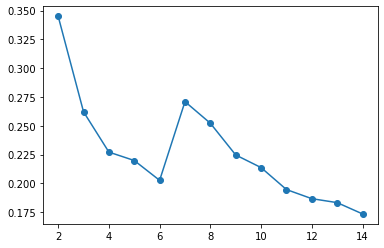

In [245]:
scores=[]
for k in range(2,15):
    knn=neighbors.KNeighborsRegressor(k)
    scores.append(knn.fit(X_train_KNN_std,y_train_KNN).score(X_test_KNN_std,y_test_KNN))
plt.plot(range(2,15),scores,'o-')
plt.show

score maxi pour k=2

In [246]:
# Utiliser si k score maxi différent de k initial :

#knn=neighbors.KNeighborsRegressor(n_neighbors=5)
#knn.fit(X_train_KNN_std,y_train_KNN)

#score=knn.score(X_test_KNN_std,y_test_KNN)
#score

In [247]:
pred_y_knn = knn.predict(X_test_KNN_std)

In [248]:
metrics.r2_score(y_test_KNN, pred_y_knn)

0.17356183770487388

##### RMSE 

In [249]:
metrics.mean_squared_error(y_test_KNN,pred_y_knn)

122039.13166165844

In [250]:
# passage au log de y  :

In [90]:
X_KNN = df_NRJ_NoNan[xtrain_columns_V2]
y_KNN_log = df_NRJ_NoNan['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_KNN, X_test_KNN, y_train_KNN_log, y_test_KNN_log = \
    model_selection.train_test_split(X_KNN, y_KNN_log, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_KNN)
X_train_KNN_std = std_scale.transform(X_train_KNN)
X_test_KNN_std = std_scale.transform(X_test_KNN)

X_KNN_std=std_scale.transform(X_KNN)


from sklearn import neighbors
knn=neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_KNN_std,y_train_KNN_log)

KNeighborsRegressor(n_neighbors=2)

In [612]:
score=knn.score(X_test_KNN_std,y_test_KNN_log)
score

0.29871725865821663

<function matplotlib.pyplot.show(close=None, block=None)>

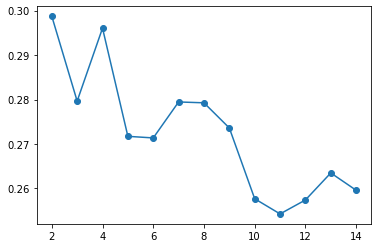

In [613]:
scores=[]
for k in range(2,15):
    knn=neighbors.KNeighborsRegressor(k)
    scores.append(knn.fit(X_train_KNN_std,y_train_KNN_log).score(X_test_KNN_std,y_test_KNN_log))
plt.plot(range(2,15),scores,'o-')
plt.show

In [614]:
pred_y_knn_log = knn.predict(X_test_KNN_std)

In [615]:
metrics.r2_score(y_test_KNN_log, pred_y_knn_log)

0.2596010601258848

In [616]:
metrics.mean_squared_error(y_test_KNN_log,pred_y_knn_log)

1.216177128728423

In [257]:
### grid search pour knn :

In [617]:
start_time = timeit.default_timer()


# grille de paramètres
param_grid = { 
    'n_neighbors':[2,3,4,5,6,7,8,9,10,11]
}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred_KNN = model_selection.GridSearchCV(
        param_grid=param_grid,        
        estimator=neighbors.KNeighborsRegressor(param_grid),
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred_KNN.fit(X_train_KNN_std, y_train_KNN_log)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_log_pred_cv_KNN = grid_pred_KNN.predict(X_test_KNN_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_KNN_log, y_test_log_pred_cv_KNN))


elapsed = timeit.default_timer() - start_time

print(elapsed)

2.312544500000513


In [618]:
grid_pred_KNN.best_params_

{'n_neighbors': 11}

In [91]:
knn=neighbors.KNeighborsRegressor(n_neighbors=11)

start_time = timeit.default_timer()


knn.fit(X_train_KNN_std,y_train_KNN_log)

elapsed = timeit.default_timer() - start_time

print(elapsed)

0.01908050000008643


In [260]:
rmse_cv

0.9161050338028776

In [261]:
metrics.r2_score(y_test_KNN_log, y_test_log_pred_cv_KNN)

0.6209341680272333

In [620]:
pred_y_knn_log = knn.predict(X_test_KNN_std)



In [621]:
metrics.r2_score(y_test_KNN_log, pred_y_knn_log)

0.2542848272397539

In [622]:
metrics.mean_squared_error(y_test_KNN_log,pred_y_knn_log)

1.2249095572867428

## XG BOOST  --> ok

In [227]:
# create an xgboost regression model
# model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [92]:
X_XGB = df_NRJ[xtrain_columns_V3]
y_XGB = df_NRJ['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = \
    model_selection.train_test_split(X_XGB, y_XGB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_XGB)
X_train_XGB_std = std_scale.transform(X_train_XGB)
X_test_XGB_std = std_scale.transform(X_test_XGB)

X_XGB_std=std_scale.transform(X_XGB)

In [67]:
X_train_XGB_std

array([[-1.25046807, -0.21524238,  0.55226468, ..., -0.16245911,
        -0.41678402, -0.23420572],
       [-0.23961161, -1.2968297 , -1.81072599, ..., -0.16245911,
        -0.41678402, -0.23420572],
       [-0.23961161, -0.31785145,  0.55226468, ..., -0.16245911,
        -0.41678402, -0.23420572],
       ...,
       [ 0.35170152,  0.46150778,  0.55226468, ..., -0.16245911,
        -0.41678402, -0.23420572],
       [-1.25046807, -1.1068199 ,  0.55226468, ..., -0.16245911,
        -0.41678402, -0.23420572],
       [ 0.77124485,  2.0845048 ,  0.55226468, ..., -0.16245911,
        -0.41678402, -0.23420572]])

In [68]:
model = xgboost.XGBRegressor()

In [69]:
from sklearn import model_selection

# define model evaluation method (cross validation)
cv = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = model_selection.cross_val_score(model, X_train_XGB_std, y_train_XGB, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [70]:
from numpy import absolute 

# force scores to be positive

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.490 (0.036)


In [71]:
from numpy import asarray

# fit model
model.fit(X_train_XGB_std, y_train_XGB)

# make a prediction
Xarray=asarray(X_test_XGB_std)

y_pred_XGB = model.predict(Xarray)

In [72]:
metrics.r2_score(y_test_XGB, y_pred_XGB)

0.648437988445123

In [73]:
# hyperopt


start_time = timeit.default_timer()


seed=2

#model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    eta=float(params['eta'])
    sbs=int(params['subsample'])
    csb=int(params['colsample_bytree'])
    
    model=xgboost.XGBRegressor(n_estimators=est,max_depth=md,eta=eta,subsample=sbs,colsample_bytree=csb)
    model.fit(X_train_XGB_std, y_train_XGB)
    pred=model.predict(X_test_XGB_std)
    score_RMSE=mean_squared_error(y_test_XGB, pred)
    score_R2=model.score(X_test_XGB_std, y_test_XGB)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'eta':hp.uniform('eta',0.01,1),
           'subsample':hp.uniform('subsample',0.1,2),
           'colsample_bytree':hp.uniform('colsample_bytree',0.1,2)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=50,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


elapsed = timeit.default_timer() - start_time

print(elapsed)

100%|████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.58trial/s, best loss: 0.5139732985570465]
31.707265800000016


In [74]:
best

{'colsample_bytree': 1.4137063957016562,
 'eta': 0.11682049756538224,
 'max_depth': 10.693291021084281,
 'n_estimators': 258.48512538405396,
 'subsample': 1.3822573014637565}

In [93]:
xgb_opt=xgboost.XGBRegressor(n_estimators=270,max_depth=13,eta=0.11,subsample=1,colsample_bytree=1)

start_time = timeit.default_timer()

xgb_opt.fit(X_train_XGB_std, y_train_XGB)

elapsed = timeit.default_timer() - start_time

print(elapsed)
pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)

2.3220016000000214


In [76]:
score_RMSE_xgb_opt

0.5406455193197888

In [77]:
score_R2_xgb_opt

0.6637757610711558

In [98]:
# recherche des features importantes pour améliorer le score

from sklearn.inspection import permutation_importance
r = permutation_importance(xgb_opt, X_test_XGB_std, y_test_XGB,
                         n_repeats=30,
                            random_state=0)

r.importances_mean.argsort()[::-1]

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_NRJ_train.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print("'"+f"{df_NRJ_train.columns[i]:<8}"+"',")

log_PropertyGFATotal0.721 +/- 0.060
Electricity0.386 +/- 0.036
Warehouse0.142 +/- 0.020
Supermarket_Grocery Store0.075 +/- 0.015
log_NumberofFloors0.073 +/- 0.010
Small- and Mid-Sized Office0.027 +/- 0.006
Self_Storage Facility0.025 +/- 0.010
1980_19890.023 +/- 0.003
1970_19790.022 +/- 0.005
Distribution Center0.020 +/- 0.004
DOWNTOWN0.017 +/- 0.005
Mixed Use Property0.011 +/- 0.003
Worship Facility0.011 +/- 0.002
EAST    0.009 +/- 0.002
1950_19590.009 +/- 0.003
Large Office0.009 +/- 0.001
1920_19290.008 +/- 0.003
Hotel   0.008 +/- 0.003
Restaurant0.006 +/- 0.001
2010_20190.006 +/- 0.002
SOUTHWEST0.006 +/- 0.002
DELRIDGE0.005 +/- 0.001
NORTHEAST0.005 +/- 0.001
1930_19390.004 +/- 0.002
NORTH   0.001 +/- 0.001
'log_PropertyGFATotal',
'Electricity',
'Warehouse',
'Supermarket_Grocery Store',
'log_NumberofFloors',
'Small- and Mid-Sized Office',
'Self_Storage Facility',
'1980_1989',
'1970_1979',
'Distribution Center',
'DOWNTOWN',
'Mixed Use Property',
'Worship Facility',
'EAST    ',
'1950_19

In [99]:
xtrain_columns_opt=['log_PropertyGFATotal',
'Electricity',
'Warehouse',
'Supermarket_Grocery Store',
'log_NumberofFloors',
'Small- and Mid-Sized Office',
'Self_Storage Facility',
'1980_1989',
'1970_1979',
'Distribution Center',
'DOWNTOWN',
'Mixed Use Property',
'Worship Facility',
'EAST',
'1950_1959',
'Large Office',
'1920_1929',
'Hotel',
'Restaurant',
'2010_2019',
'SOUTHWEST',
'DELRIDGE',
'NORTHEAST',
'1930_1939',
'NORTH']


In [100]:
# on rééssaie avec ces nouvelles features

X_XGB = df_NRJ[xtrain_columns_opt]
y_XGB = df_NRJ['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = \
    model_selection.train_test_split(X_XGB, y_XGB, test_size=0.1)


std_scale = preprocessing.StandardScaler().fit(X_train_XGB)
X_train_XGB_std = std_scale.transform(X_train_XGB)
X_test_XGB_std = std_scale.transform(X_test_XGB)

X_XGB_std=std_scale.transform(X_XGB)

In [81]:
# hyperopt


start_time = timeit.default_timer()


seed=2

#model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    eta=float(params['eta'])
    sbs=int(params['subsample'])
    csb=int(params['colsample_bytree'])
    
    model=xgboost.XGBRegressor(n_estimators=est,max_depth=md,eta=eta,subsample=sbs,colsample_bytree=csb)
    model.fit(X_train_XGB_std, y_train_XGB)
    pred=model.predict(X_test_XGB_std)
    score_RMSE=mean_squared_error(y_test_XGB, pred)
    score_R2=model.score(X_test_XGB_std, y_test_XGB)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'eta':hp.uniform('eta',0.01,1),
           'subsample':hp.uniform('subsample',0.1,2),
           'colsample_bytree':hp.uniform('colsample_bytree',0.1,2)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=50,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


elapsed = timeit.default_timer() - start_time

print(elapsed)

100%|████████████████████████████████████████████████| 50/50 [00:27<00:00,  1.84trial/s, best loss: 0.1384435373014314]
27.12853839999991


In [82]:
best

{'colsample_bytree': 1.5174618871256238,
 'eta': 0.09813775447411308,
 'max_depth': 18.114160620787242,
 'n_estimators': 155.06809290427208,
 'subsample': 1.420411985170184}

In [101]:
xgb_opt=xgboost.XGBRegressor(n_estimators=155,max_depth=18,eta=0.60,subsample=1,colsample_bytree=1)
xgb_opt.fit(X_train_XGB_std, y_train_XGB)
pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)

In [102]:
score_RMSE_xgb_opt

0.2565234960396654

In [103]:
score_R2_xgb_opt

0.8065776559980637

In [636]:
df_NRJ.shape

(2504, 78)

In [127]:
#Lime :

In [255]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_XGB_std, mode='regression',training_labels=y_train_XGB, 
                                                   feature_names=xtrain_columns_V2) #, categorical_features=['CHAS'])
explanation = explainer.explain_instance(X_test_XGB_std[0], xgb_opt.predict)
explanation.show_in_notebook()

ValueError: Domain error in arguments.

In [ ]:
# SHAP :

In [100]:
shap.initjs()

In [105]:
explainer = shap.TreeExplainer(xgb_opt)
shap_values = explainer.shap_values(X_test_XGB_std)



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [176]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_XGB_std[0,:])


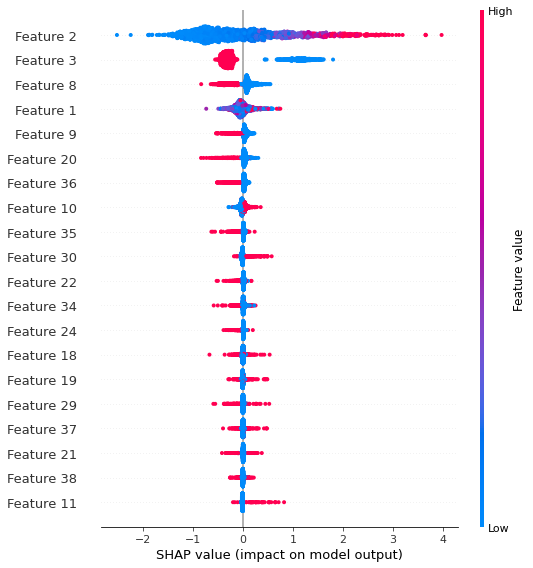

In [177]:
shap.summary_plot(shap_values, X_test_XGB_std)


In [106]:
#global :
shap.force_plot(explainer.expected_value, shap_values, X_test_XGB_std)


In [107]:
xtrain_columns_opt

['log_PropertyGFATotal',
 'Electricity',
 'Warehouse',
 'Supermarket_Grocery Store',
 'log_NumberofFloors',
 'Small- and Mid-Sized Office',
 'Self_Storage Facility',
 '1980_1989',
 '1970_1979',
 'Distribution Center',
 'DOWNTOWN',
 'Mixed Use Property',
 'Worship Facility',
 'EAST',
 '1950_1959',
 'Large Office',
 '1920_1929',
 'Hotel',
 'Restaurant',
 '2010_2019',
 'SOUTHWEST',
 'DELRIDGE',
 'NORTHEAST',
 '1930_1939',
 'NORTH']

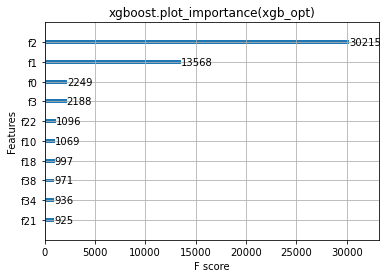

In [272]:
xgboost.plot_importance(xgb_opt,max_num_features=10)
plt.title("xgboost.plot_importance(xgb_opt)")
plt.show()

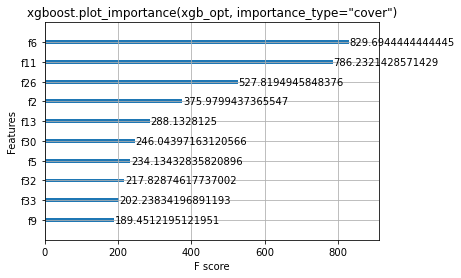

In [284]:
xgboost.plot_importance(xgb_opt, importance_type="cover",max_num_features=10)
plt.title('xgboost.plot_importance(xgb_opt, importance_type="cover")')
plt.show()

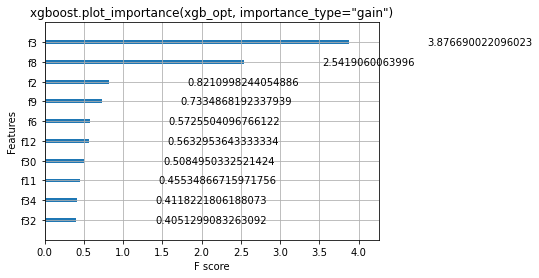

In [273]:
xgboost.plot_importance(xgb_opt, importance_type="gain",max_num_features=10)
plt.title('xgboost.plot_importance(xgb_opt, importance_type="gain")')
plt.show()


# grille de paramètres
param_grid = { 
    'n_estimators':[100,1000,10000], 
    'max_depth':[2,3,4,5,6,7,8]
}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred_XGB = model_selection.GridSearchCV(
        estimator=xgboost.XGBRegressor,
        param_grid=param_grid,
        cv=5,
        scoring=score)
                                    



grid_pred_XGB.best_params_

# exécuter la validation croisée sur le jeu d'entraînement
grid_pred_XGB.fit(X_train_XGB_std, y_train_XGB)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv_XGB = grid_pred.predict(X_test_XGB_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(metrics.mean_squared_error(y_test_XGB, y_test_pred_cv_XGB))

In [272]:
df_NRJ.describe()

OSEBuildingID     DataYear       ZipCode  CouncilDistrictCode    YearBuilt  log_GHGEmissions(MetricTonsCO2e)  NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu)  GHGEmissions(MetricTonsCO2e)  Electricity        Steam   NaturalGas       Campus  Multifamily HR (10+)  Multifamily LR (1-4)  Multifamily MR (5-9)  NonResidential  Nonresidential COS  Nonresidential WA  SPS-District K-12      BALLARD      Ballard      CENTRAL     Central     DELRIDGE  DELRIDGE NEIGHBORHOODS     DOWNTOWN     Delridge         EAST  GREATER DUWAMISH   LAKE UNION  MAGNOLIA / QUEEN ANNE        NORTH    NORTHEAST    NORTHWEST        North    Northwest    SOUTHEAST    SOUTHWEST  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7    1900_1909    1910_1919    1920_1929    1930_1939    1940_1949    1950_1959    1960_1969    1970_1979    1980_1989    1990_1999  \
count    6532.000000  6532.000000   6519.000000          6532.000000  6532.000000                       6532.000000        6532.000000     6532.000000      6.532000e+03      4956.000000         6.532000e+03                   6532.000000  6532.000000  6532.000000  6532.000000  6532.000000           6532.000000           6532.000000           6532.000000     6532.000000         6532.000000        6532.000000        6532.000000  6532.000000  6532.000000  6532.000000  6532.00000  6532.000000             6532.000000  6532.000000  6532.000000  6532.000000       6532.000000  6532.000000            6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000            6532.000000            6532.000000            6532.000000            6532.000000            6532.000000            6532.000000            6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000  6532.000000   
mean    20959.375689  2015.490508  98116.817763             4.464789  1968.182639                          3.486109           1.072719        4.744948      9.334938e+04        67.586158         5.258070e+06                    116.127936     0.789651     0.009186     0.201164     0.007042              0.032915              0.307103              0.172076        0.442131            0.022811           0.000153           0.015769     0.038273     0.000919     0.034293     0.00398     0.024189                0.000153     0.173301     0.000612     0.135181          0.111145     0.075168               0.126914     0.049449     0.079914     0.064758     0.006124     0.001531     0.026638     0.047459               0.081292               0.150337               0.176056               0.105481               0.101041               0.073025               0.312768     0.064299     0.056338     0.091855     0.022198     0.026485     0.062921     0.133344     0.093233     0.128138     0.112829   
std     11826.883702     0.499948     17.786809             2.121732    33.069919                          1.499750           1.613963        5.520262      1.891809e+05        27.060981         1.835044e+07                    484.567028     0.407588     0.095407     0.400901     0.083629              0.178427              0.461328              0.377475        0.496678            0.149311           0.012373           0.124588     0.191870     0.030296     0.181994     0.06297     0.153646                0.012373     0.378536     0.024740     0.341943          0.314336     0.263683               0.332902     0.216820     0.271181     0.246117     0.078020     0.039100     0.161036     0.212634               0.273304               0.357429               0.380897               0.307195               0.301406               0.260198               0.463656     0.245303     0.230591     0.288844     0.147340     0.160585     0.242839     0.339972     0.290781     0.334269     0.316408   
min         1.000000  2015.

# ------------------------------------------------------
# -----------------------------------------------------------
# -----------------------------------------------------------------------

# Recommencer les modélisations avec Site Energy Use

## Dummy Regressor --> Hyperopt Optuna pas besoin

In [114]:
df_NRJ=df_NRJ_initial[df_NRJ_initial['SiteEnergyUse(kBtu)']>0]

df_NRJ['Log_SiteEnergyUse(kBtu)']=np.log(df_NRJ['SiteEnergyUse(kBtu)'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [115]:
list(df_NRJ.columns[18:-1])

['Electricity',
 'Steam',
 'NaturalGas',
 'log_NumberofFloors',
 'log_NumberofBuildings',
 'log_PropertyGFATotal',
 'BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST',
 'CouncilDistrictCode_1',
 'CouncilDistrictCode_2',
 'CouncilDistrictCode_3',
 'CouncilDistrictCode_4',
 'CouncilDistrictCode_5',
 'CouncilDistrictCode_6',
 'CouncilDistrictCode_7',
 'Decade',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019',
 'College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K_12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self_Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office

In [116]:



#df_NRJ_NoNan=df_NRJ[~df_NRJ['Log_SiteEnergyUse(kBtu)'].isna()]
df_NRJ_NoNan=df_NRJ

X_DR = df_NRJ_NoNan[xtrain_columns_V2]

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_DR)
X_DR_std = std_scale.transform(X_DR)

data_std=pd.DataFrame(X_DR_std,columns=xtrain_columns_V2)

data_std=data_std.assign(logGHGEmissions=df_NRJ_NoNan['Log_SiteEnergyUse(kBtu)'])

In [40]:
data_std

NumberofBuildings  NumberofFloors  PropertyGFATotal  Electricity      Steam  NaturalGas   Campus  Multifamily HR (10+)  Multifamily LR (1-4)  Multifamily MR (5-9)  NonResidential  Nonresidential COS  Nonresidential WA  SPS-District K-12   BALLARD   Ballard   CENTRAL   Central  DELRIDGE  DELRIDGE NEIGHBORHOODS  DOWNTOWN  Delridge      EAST  GREATER DUWAMISH  LAKE UNION  MAGNOLIA / QUEEN ANNE     NORTH  NORTHEAST  NORTHWEST     North  Northwest  SOUTHEAST  SOUTHWEST  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7    Decade  1900_1909  1910_1919  1920_1929  1930_1939  1940_1949  1950_1959  1960_1969  1970_1979  1980_1989  1990_1999  2000_2009  2010_2019  logGHGEmissions
0             -0.045035        1.315194         -0.025688     0.517435  -0.096232   -0.501481 -0.08417             -0.184384             -0.666427               -0.4556        1.123668           -0.152701          -0.012367          -0.126506 -0.199379 -0.030305 -0.188773 -0.063182 -0.157356               -0.012367  2.185521  -0.02474 -0.395376         -0.353401   -0.285241              -0.381293 -0.227953  -0.294847  -0.262988 -0.078452  -0.039136  -0.165339   -0.22384              -0.297900              -0.420374              -0.462437              -0.343744              -0.335058              -0.280512               1.482943 -1.321056   -0.26199    -0.2442   3.146162  -0.150591   -0.16485  -0.258977  -0.392526  -0.320756  -0.383133  -0.356678  -0.416083  -0.254919        15.758764
1             -0.045035        1.133942          0.054344    -1.932608  -0.096232    1.994093 -0.08417             -0.184384             -0.666427               -0.4556        1.123668           -0.152701          -0.012367          -0.126506 -0.199379 -0.030305 -0.188773 -0.063182 -0.157356               -0.012367  2.185521  -0.02474 -0.395376         -0.353401   -0.285241              -0.381293 -0.227953  -0.294847  -0.262988 -0.078452  -0.039136  -0.165339   -0.22384              -0.297900              -0.420374              -0.462437              -0.343744              -0.335058              -0.280512               1.482943  0.796418   -0.26199    -0.2442  -0.317848  -0.150591   -0.16485  -0.258977  -0.392526  -0.320756  -0.383133   2.803646  -0.416083  -0.254919        15.938279
2             -0.045035        6.571509          4.594496     0.517435  -0.096232   -0.501481 -0.08417             -0.184384             -0.666427               -0.4556        1.123668           -0.152701          -0.012367          -0.126506 -0.199379 -0.030305 -0.188773 -0.063182 -0.157356               -0.012367  2.185521  -0.02474 -0.395376         -0.353401   -0.285241              -0.381293 -0.227953  -0.294847  -0.262988 -0.078452  -0.039136  -0.165339   -0.22384              -0.297900              -0.420374              -0.462437              -0.343744              -0.335058              -0.280512               1.482943 -0.111071   -0.26199    -0.2442  -0.317848  -0.150591   -0.16485  -0.258977   2.547600  -0.320756  -0.383133  -0.356678  -0.416083  -0.254919        18.107758
3             -0.045035        0.952690         -0.169092    -1.932608  10.391503   -0.501481 -0.08417             -0.184384             -0.666427               -0.4556        1.123668           -0.152701          -0.012367          -0.126506 -0.199379 -0.030305 -0.188773 -0.063182 -0.157356               -0.012367  2.185521  -0.02474 -0.395376         -0.353401   -0.285241              -0.381293 -0.227953  -0.294847  -0.262988 -0.078452  -0.039136  -0.165339   -0.22384              -0.297900              -0.420374              -0.462437              -0.343744              -0.335058              -0.280512               1.482943 -1.321056   -0.26199    -0.2442   3.146162  -0.150591   -0.16485  -0.258977  -0.392526  -0.320756  -0.383133  -0.356678  -0.416083  -0.254919        17.155872
4             -0.045035        

In [117]:

data_std=data_std[~data_std['logGHGEmissions'].isna()]

X_std_DR = data_std[xtrain_columns_V2]
y_log_DR = data_std['logGHGEmissions']

X_train_std_DR, X_test_std_DR, y_train_log_DR, y_test_log_DR = train_test_split(X_std_DR, y_log_DR, random_state=0)


dummy_regr = DummyRegressor(strategy="mean")

start_time = timeit.default_timer()

dummy_regr.fit(X_train_std_DR, y_train_log_DR)
elapsed = timeit.default_timer() - start_time

print(elapsed)

y_log_predict_DR=dummy_regr.predict(X_test_std_DR)

# R2 :
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test_log_DR, y_log_predict_DR)))

# RMSE : 
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test_log_DR, y_log_predict_DR)))

0.00034960000016326376
r2_score (dummy mean): -0.02
Mean squared error (linear model): 1.20


## Linear Regression --> Hyperopt Optuna pas besoin

In [119]:

X_LR = df_NRJ_NoNan[xtrain_columns_V2]

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_LR)
X_LR_std = std_scale.transform(X_LR)

abc=list(df_NRJ_NoNan['Log_SiteEnergyUse(kBtu)'])

data_std=pd.DataFrame(X_LR_std,columns=xtrain_columns_V2)

data_std=data_std.assign(logSiteEnergyUse=df_NRJ_NoNan['Log_SiteEnergyUse(kBtu)'])



df_NRJ_NoNan=df_NRJ[~df_NRJ['Log_SiteEnergyUse(kBtu)'].isna()]

mod = sm.regression.linear_model.OLS.from_formula(
    #formula='logSiteEnergyUse ~ NumberofFloors+PropertyGFATotal+Electricity+Steam+NaturalGas+Campus+Q("Multifamily HR (10+)")+Q("Multifamily LR (1-4)")+Q("Multifamily MR (5-9)")+NonResidential+Q("Nonresidential COS")+Q("Nonresidential WA")+Q("SPS-District K-12")+BALLARD+Ballard+CENTRAL+Central+DELRIDGE+Q("DELRIDGE NEIGHBORHOODS")+DOWNTOWN+Delridge+EAST+Q("GREATER DUWAMISH")+Q("LAKE UNION")+Q("MAGNOLIA / QUEEN ANNE")+NORTH+NORTHEAST+NORTHWEST+North+Northwest+SOUTHEAST+SOUTHWEST+CouncilDistrictCode_1+CouncilDistrictCode_2+CouncilDistrictCode_3+CouncilDistrictCode_4+CouncilDistrictCode_5+CouncilDistrictCode_6+CouncilDistrictCode_7+Q("1900_1909")+Q("1910_1919")+Q("1920_1929")+Q("1930_1939")+Q("1940_1949")+Q("1950_1959")+Q("1960_1969")+Q("1970_1979")+Q("1980_1989")+Q("1990_1999")+Q("2000_2009")+Q("2010_2019")',
    formula= 'logSiteEnergyUse ~ log_NumberofFloors+log_PropertyGFATotal+Electricity+Steam+NaturalGas+BALLARD+CENTRAL+DELRIDGE+DOWNTOWN+EAST+Q("GREATER DUWAMISH")+Q("LAKE UNION")+Q("MAGNOLIA / QUEEN ANNE")+NORTH+NORTHEAST+NORTHWEST+SOUTHEAST+SOUTHWEST+Q("1900_1909")+Q("1910_1919")+Q("1920_1929")+Q("1930_1939")+Q("1940_1949")+Q("1950_1959")+Q("1960_1969")+Q("1970_1979")+Q("1980_1989")+Q("1990_1999")+Q("2000_2009")+Q("2010_2019")+Q("College/University")+Q("Distribution Center")+Hospital+Hotel+Q("K_12 School")+Laboratory+Q("Large Office")+Q("Low-Rise Multifamily")+Q("Medical Office")+Q("Mixed Use Property")+Other+Q("Residence Hall/Dormitory")+Restaurant+Q("Retail Store")+Q("Self_Storage Facility")+Q("Senior Care Community")+Q("Small- and Mid-Sized Office")+Q("Supermarket_Grocery Store")+Warehouse+Q("Worship Facility")',
                                 
    data=data_std)


start_time = timeit.default_timer()

res=mod.fit()

elapsed = timeit.default_timer() - start_time

print(elapsed)

print(res.summary())

0.004213000000163447
                            OLS Regression Results                            
Dep. Variable:       logSiteEnergyUse   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     12.54
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.40e-83
Time:                        15:06:03   Log-Likelihood:                -3395.5
No. Observations:                2501   AIC:                             6887.
Df Residuals:                    2453   BIC:                             7167.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

## Régression Ridge à noyau --> erreur singular matrix (matrice non inversible ?) - corrigé en partie, beug tjs un peu
## Optuna pas fait

###### https://github.com/marcotcr/lime/issues/388

<AxesSubplot:>

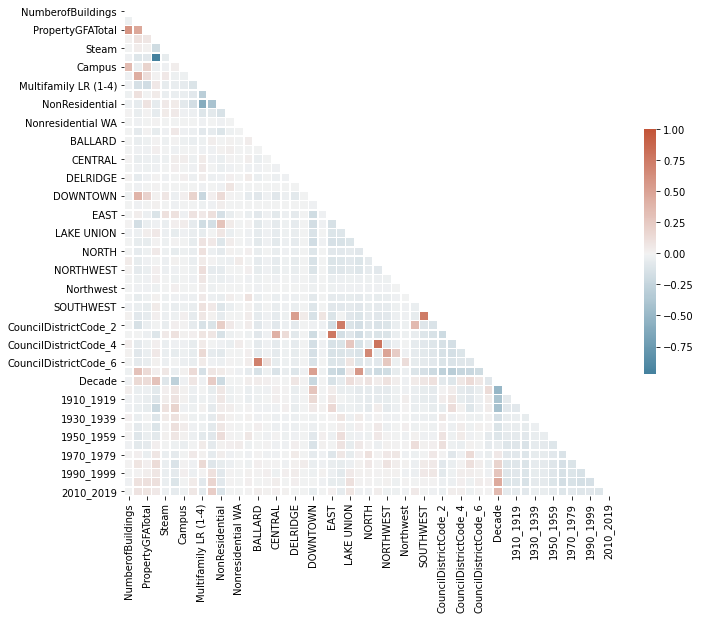

In [52]:
## matrice de corrélation :

dfcorr1=df_NRJ[xtrain_columns]


corr1 = dfcorr1.corr()

corr1


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
xtrain_columns

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'Electricity',
 'Steam',
 'NaturalGas',
 'Campus',
 'Multifamily HR (10+)',
 'Multifamily LR (1-4)',
 'Multifamily MR (5-9)',
 'NonResidential',
 'Nonresidential COS',
 'Nonresidential WA',
 'SPS-District K-12',
 'BALLARD',
 'Ballard',
 'CENTRAL',
 'Central',
 'DELRIDGE',
 'DELRIDGE NEIGHBORHOODS',
 'DOWNTOWN',
 'Delridge',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'North',
 'Northwest',
 'SOUTHEAST',
 'SOUTHWEST',
 'CouncilDistrictCode_1',
 'CouncilDistrictCode_2',
 'CouncilDistrictCode_3',
 'CouncilDistrictCode_4',
 'CouncilDistrictCode_5',
 'CouncilDistrictCode_6',
 'CouncilDistrictCode_7',
 'Decade',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019']

In [120]:
df_NRJ_NoNan=df_NRJ[~df_NRJ['Log_SiteEnergyUse(kBtu)'].isna()]

X_Ridge = df_NRJ_NoNan[xtrain_columns_V2]
y_Ridge = df_NRJ_NoNan['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_Ridge, X_test_Ridge, y_train_Ridge, y_test_Ridge = \
    model_selection.train_test_split(X_Ridge, y_Ridge, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_Ridge)
X_train_Ridge_std = std_scale.transform(X_train_Ridge)
X_test_Ridge_std = std_scale.transform(X_test_Ridge)

X_Ridge_std=std_scale.transform(X_Ridge)


from sklearn import kernel_ridge
predicteur_Ridge = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)

In [121]:

                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur_Ridge.fit(X_train_Ridge_std, y_train_Ridge)

# prédire sur le jeu de test
y_test_Ridge_pred = predicteur_Ridge.predict(X_test_Ridge_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_test_Ridge_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.85


In [122]:
print("R2 : "+str(r2_score(y_test_Ridge, y_test_Ridge_pred)))

R2 : 0.3558448174923642


In [58]:
# HyperOpt et Optuna

In [127]:
## Modèle HyperOpt
start_time = timeit.default_timer()

seed=2

#predicteur_Ridge = kernel_ridge.KernelRidge(
#    alpha=1.0, # valeur par défaut 
#    kernel='rbf', # noyau Gaussien
#    gamma=0.01)   # valeur de 1/(2 * sigma**2)


def objective(params):
    alpha=float(params['alpha'])
    gamma=float(params['gamma'])
    kernel=(params['kernel'])
    
    model=kernel_ridge.KernelRidge(alpha=alpha,kernel=kernel,gamma=gamma)
    model.fit(X_train_Ridge_std, y_train_Ridge)
    pred=model.predict(X_test_Ridge_std)
    #score_RMSE=mean_squared_error(y_test_Ridge, pred)
    #score_R2=model.score(X_test_Ridge_std, y_test_Ridge)
    #return score_RMSE
    #return score_R2

def optimize(trial):
    params={'alpha':hp.uniform('alpha',0.001,10),
           'gamma':hp.uniform('gamma',0.001,20),
           'kernel':hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf'])}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=10,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)



elapsed = timeit.default_timer() - start_time

print(elapsed)


  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]

job exception: 'NoneType' object is not iterable



  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]


TypeError: 'NoneType' object is not iterable

In [60]:
best

{'alpha': 2.27777168033349, 'gamma': 3.9921113902317873, 'kernel': 2}

In [182]:
# A compléter


Ridge_opt=kernel_ridge.KernelRidge(alpha= 2.27777168033349, gamma=3.9921113902317873, kernel='poly')
    #n_estimators=270,max_depth=13,eta=0.11,subsample=1,colsample_bytree=1)

start_time = timeit.default_timer()
  
Ridge_opt.fit(X_train_Ridge_std, y_train_Ridge)

elapsed = timeit.default_timer() - start_time

print(elapsed)  

pred_Ridge_opt=Ridge_opt.predict(X_test_Ridge_std)
score_RMSE_Ridge_opt=mean_squared_error(y_test_Ridge,pred_Ridge_opt)
score_R2_Ridge_opt=Ridge_opt.score(X_test_Ridge_std, y_test_Ridge)

0.23281479999968724


In [124]:
score_RMSE_Ridge_opt

69.42640420248183

In [125]:
score_R2_Ridge_opt

-60.56959450769086

## Random Forest --> Hyperopt en place, à optimiser, Optuna pas fait

In [130]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_features=0.5,n_estimators=100,max_depth=10.0,min_samples_leaf=1,min_samples_split=2,n_jobs=1)

In [145]:
X_RF = df_NRJ[xtrain_columns_V2]
y_RF_log = df_NRJ['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_RF, X_test_RF, y_train_RF_log, y_test_RF_log = \
    model_selection.train_test_split(X_RF, y_RF_log, test_size=0.2)

std_scale = preprocessing.StandardScaler().fit(X_train_RF)
X_train_RF_std = std_scale.transform(X_train_RF)
X_test_RF_std = std_scale.transform(X_test_RF)

X_RF_std=std_scale.transform(X_RF)

model = rfr.fit(X_train_RF_std, y_train_RF_log)

pred = rfr.predict(X_test_RF_std)

metrics.mean_squared_error(y_test_RF_log, pred)

0.2998082711680058

In [146]:
rfr.score(X_test_RF_std, y_test_RF_log)

0.7254864288771916

In [138]:
# HyperOpt

In [139]:
start_time = timeit.default_timer()



seed=2

def objective(params):
    mf=float(params['max_features'])
    est=int(params['n_estimators'])
    md=float(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    nj=(params['n_jobs'])
    
    model=RandomForestRegressor(max_features=mf,n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss,n_jobs=nj)
    model.fit(X_train_RF_std, y_train_RF_log)
    pred=model.predict(X_test_RF_std)
    score_RMSE=mean_squared_error(y_test_RF_log, pred)
    score_R2=model.score(X_test_RF_std, y_test_RF_log)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'max_features':hp.uniform('max_features',0.0,1.0),
           'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5.0,20.0),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2.0,6.0),
           'n_jobs':hp.choice('n_jobs',[-1,1])}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=20,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


elapsed = timeit.default_timer() - start_time

print(elapsed)

100%|████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.40trial/s, best loss: 0.2814171876955242]
14.251471400000355


In [109]:
best

{'max_depth': 17.345603882956127,
 'max_features': 0.47194067017666297,
 'min_samples_leaf': 1.583631945561164,
 'min_samples_split': 2.373167820699558,
 'n_estimators': 284.3372366080888,
 'n_jobs': 1}

In [181]:
rfr_opt=RandomForestRegressor(max_features=0.8,n_estimators=200,max_depth=19,
                              min_samples_leaf=2,min_samples_split=3)

start_time = timeit.default_timer()

rfr_opt.fit(X_train_RF_std, y_train_RF_log)

elapsed = timeit.default_timer() - start_time

print(elapsed)

pred_rfr_opt=rfr_opt.predict(X_test_RF_std)
score_RMSE_rfr_opt=mean_squared_error(y_test_RF_log,pred_rfr_opt)
score_R2_rfr_opt=rfr_opt.score(X_test_RF_std, y_test_RF_log)


1.1941477999998824


In [148]:
score_RMSE_rfr_opt

0.2655593426599327

In [149]:
score_R2_rfr_opt

0.7568457894286967

In [113]:
# Optuna

In [114]:
# calcul du poids des variables : shap

In [148]:
# shap trop long, essayer avec lime
#explainer = shap.Explainer(rfr_opt)
#shap_values = explainer.shap_values(X_train_RF_std)
#shap.plots.waterfall(shap_values[0])

In [ ]:
# calcul du poids des variables : lime

In [150]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_RF_std, mode='regression',training_labels=y_train_RF_log, 
                                                   feature_names=xtrain_columns_V2) #, categorical_features=['CHAS'])
explanation = explainer.explain_instance(X_test_RF_std[0], rfr_opt.predict)
explanation.show_in_notebook()

In [ ]:
#explain_instance(data_row, predict_fn, labels=(1, ), 
#                 top_labels=None, num_features=10, num_samples=5000, distance_metric='euclidean', model_regressor=None, sampling_method='gaussian')

In [77]:
rfr_opt.predict(X_test_RF_std)

array([14.36755118, 13.63497201, 13.58896482, ..., 14.14072628,
       14.29441465, 14.49360561])

In [80]:
len(pred_rfr_opt)

1962

In [81]:
len(X_test_RF_std[0])

45

In [153]:
xtrain_columns_V2

['log_NumberofFloors',
 'log_PropertyGFATotal',
 'Electricity',
 'Steam',
 'NaturalGas',
 'BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019',
 'College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K_12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self_Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket_Grocery Store',
 'Warehouse',
 'Worship Facility']

In [150]:
# init :
shap.initjs()

explainer = shap.TreeExplainer(rfr_opt)
shap_values = explainer.shap_values(X_test_RF_std)

# unique value :
    #shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_RF_std[0,:])

# global : 
shap.force_plot(explainer.expected_value, shap_values, X_test_RF_std)

## G Boost --> Hyperopt optimisé, Optuna pas fait

In [183]:
X_GB = df_NRJ[xtrain_columns_V2]
y_GB = df_NRJ['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_GB, X_test_GB, y_train_GB_log, y_test_GB_log = \
    model_selection.train_test_split(X_GB, y_GB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_Ridge)
X_train_GB_std = std_scale.transform(X_train_GB)
X_test_GB_std = std_scale.transform(X_test_GB)

X_GB_std=std_scale.transform(X_GB)

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01,
    max_depth=3, random_state=0, loss='ls').fit(X_train_GB_std, y_train_GB_log)

mean_squared_error(y_test_GB_log, est.predict(X_test_GB_std))

0.6161389437608302

In [184]:
metrics.r2_score(y_test_GB_log, est.predict(X_test_GB_std))

0.5535588315220688

In [ ]:
# HyperOpt et Optuna

In [185]:
start_time = timeit.default_timer()


seed=2


def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    lr=float(params['learning_rate'])
    rs=int(params['random_state'])
    loss=(params['loss'])
    
    model=GradientBoostingRegressor(n_estimators=est,max_depth=md,learning_rate=lr,random_state=rs,loss=loss)
    model.fit(X_train_GB_std, y_train_GB_log)
    pred=model.predict(X_test_GB_std)
    score_RMSE=mean_squared_error(y_test_GB_log, pred)
    score_R2=model.score(X_test_GB_std, y_test_GB_log)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',50,500),
           'max_depth':hp.uniform('max_depth',1,20),
           'learning_rate':hp.uniform('learning_rate',0.01,1),
           'random_state':hp.uniform('random_state',0,10),
           'loss':hp.choice('loss', ['ls'])}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=10,rstate=np.random.RandomState(seed))
    return best


trial=Trials()
best=optimize(trial)


elapsed = timeit.default_timer() - start_time

print(elapsed)

100%|████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.36s/trial, best loss: 0.2373077718913183]
33.62681919999977


In [186]:
best

{'learning_rate': 0.10564985799355488,
 'loss': 0,
 'max_depth': 11.71459328341884,
 'n_estimators': 241.91305414105236,
 'random_state': 5.267042605674003}

In [187]:

gb_opt=GradientBoostingRegressor(n_estimators=242,max_depth=12,learning_rate=0.11,random_state=5,loss='ls')
gb_opt.fit(X_train_GB_std, y_train_GB_log)
pred_gb_opt=gb_opt.predict(X_test_GB_std)
score_RMSE_gb_opt=mean_squared_error(y_test_GB_log,pred_gb_opt)
score_R2_gb_opt=gb_opt.score(X_test_GB_std, y_test_GB_log)

In [188]:
score_RMSE_gb_opt

0.2423053218962587

In [189]:
score_R2_gb_opt

0.8244307195135228

## SVM à noyau  --> trop long

In [128]:
X_SVM = df_NRJ[xtrain_columns_V2]
y_SVM_log = df_NRJ['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_SVM, X_test_SVM, y_train_SVM_log, y_test_SVM_log = \
    model_selection.train_test_split(X_SVM, y_SVM_log, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_SVM)
X_train_SVM_std = std_scale.transform(X_train_SVM)
X_test_SVM_std = std_scale.transform(X_test_SVM)

X_SVM_std=std_scale.transform(X_SVM)


# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
from sklearn import svm
SVM_regressor = svm.SVR(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
SVM_regressor.fit(X_train_SVM_std, y_train_SVM_log)

# prédire sur le jeu de test
y_test_SVM_pred_log = SVM_regressor.predict(X_test_SVM_std)

metrics.r2_score(y_test_SVM_log, y_test_SVM_pred_log)



0.5897512189430381

In [129]:
metrics.mean_squared_error(y_test_SVM_log,y_test_SVM_pred_log)

0.5086568688777535

In [67]:
# HyperOpt

In [ ]:
import sklearn

X = X_train_SVM_std
y = y_train_SVM_log
def hyperopt_train_test(params):
    clf = svm.SVR(**params)
    return sklearn.model_selection.cross_val_score(clf, X, y).mean()
space4svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20),
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4svm, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
best

 30%|██████████████▍                                 | 3/10 [00:19<00:44,  6.40s/trial, best loss: -0.5438789102371229]

In [ ]:
## Modèle HyperOpt


seed=2

def objective(params):
    C=int(params['C'])
    kernel=params['kernel']
    gamma=float(params['gamma'])

    
    #model=xgboost.XGBRegressor(n_estimators=est,max_depth=md,eta=eta,subsample=sbs,colsample_bytree=csb)
    model=svm.SVR(C=C,kernel=kernel,gamma=gamma)
    model.fit(X_train_SVM_std, y_train_SVM_log)
    pred=model.predict(X_test_SVM_std)
    score_RMSE=mean_squared_error(y_test_SVM_log, pred)
    score_R2=model.score(X_test_SVM_std, y_test_SVM_log)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'C':hp.uniform('C',1,20),
           'kernel':hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
           'gamma': hp.uniform('gamma', 0, 20)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=10,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


 50%|████████████████████████▌                        | 5/10 [01:50<01:12, 14.43s/trial, best loss: 0.6066378605837776]

In [180]:
rfr_opt=svm.SVR(C=17.429091147084115, gamma=15.28083107419472, kernel='rbf')

start_time = timeit.default_timer()

rfr_opt.fit(X_train_SVM_std, y_train_SVM_log)

elapsed = timeit.default_timer() - start_time

print(elapsed)
pred_rfr_opt=rfr_opt.predict(X_test_SVM_std)
score_RMSE_rfr_opt=mean_squared_error(y_test_SVM_log,pred_rfr_opt)
score_R2_rfr_opt=rfr_opt.score(X_test_SVM_std, y_test_SVM_log)

0.29224229999999807


In [ ]:
#metrics.r2_score(y_test_SVM_log, y_test_SVM_pred_log)

#metrics.mean_squared_error(y_test_SVM_log,y_test_SVM_pred_log)

In [ ]:
score_RMSE_rfr_opt

In [177]:
score_R2_rfr_opt

0.5567812599969109

In [ ]:
# Optuna

## KNN --> ok

<function matplotlib.pyplot.show(close=None, block=None)>

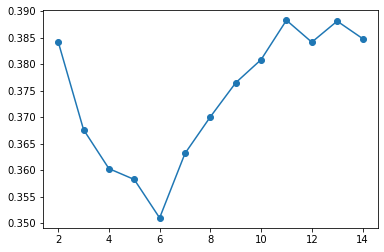

In [154]:
X_KNN = df_NRJ[xtrain_columns_V2]
y_KNN_log = df_NRJ['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_KNN, X_test_KNN, y_train_KNN_log, y_test_KNN_log = \
    model_selection.train_test_split(X_KNN, y_KNN_log, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_KNN)
X_train_KNN_std = std_scale.transform(X_train_KNN)
X_test_KNN_std = std_scale.transform(X_test_KNN)

X_KNN_std=std_scale.transform(X_KNN)


from sklearn import neighbors
knn=neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_KNN_std,y_train_KNN_log)

score=knn.score(X_test_KNN_std,y_test_KNN_log)
score

scores=[]
for k in range(2,15):
    knn=neighbors.KNeighborsRegressor(k)
    scores.append(knn.fit(X_train_KNN_std,y_train_KNN_log).score(X_test_KNN_std,y_test_KNN_log))
plt.plot(range(2,15),scores,'o-')
plt.show


In [155]:
pred_y_knn_log = knn.predict(X_test_KNN_std)

metrics.r2_score(y_test_KNN_log, pred_y_knn_log)


0.38481427234490784

In [156]:
metrics.mean_squared_error(y_test_KNN_log,pred_y_knn_log)

0.7166815051346654

In [213]:
score

0.6076383098395859

In [58]:
# HyperOpt

In [161]:
import sklearn

In [162]:
start_time = timeit.default_timer()


from sklearn import datasets
from sklearn import model_selection

#iris = datasets.load_iris()

X = X_train_KNN_std
y = y_train_KNN_log
def hyperopt_train_test(params):
    knn = neighbors.KNeighborsRegressor(**params)
    return sklearn.model_selection.cross_val_score(knn, X, y).mean()
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(2,100))
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=20, trials=trials)


elapsed = timeit.default_timer() - start_time

print(elapsed)

100%|██████████████████████████████████████████████| 20/20 [00:05<00:00,  3.90trial/s, best loss: -0.40189583898031944]
5.152066599999671


In [163]:
print ('best:')
best

best:


{'n_neighbors': 3}

In [164]:
knn=neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_KNN_std,y_train_KNN_log)

score=knn.score(X_test_KNN_std,y_test_KNN_log)
score

0.3676273252776734

In [165]:
pred_y_knn_log = knn.predict(X_test_KNN_std)

metrics.r2_score(y_test_KNN_log, pred_y_knn_log)

0.3676273252776734

In [166]:
metrics.mean_squared_error(y_test_KNN_log,pred_y_knn_log)

0.7367040227892385

In [65]:
# Optuna

In [208]:
start_time = timeit.default_timer()


seed=2

def objective(params):
    k=int(params['n_neighbors'])

    
    model=neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_KNN_std,y_train_KNN_log)
    pred=model.predict(X_test_KNN_std)
    score_RMSE=mean_squared_error(y_test_KNN_log, pred)
    score_R2=model.score(X_test_KNN_std, y_test_KNN_log)
    return score_RMSE
    return score_R2


def optimize(trial):
    params={'n_neighbors':hp.uniform('n_neighbors',1,100)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=50,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)

elapsed = timeit.default_timer() - start_time

print(elapsed)

100%|████████████████████████████████████████████████| 50/50 [01:03<00:00,  1.28s/trial, best loss: 0.4179897326812208]
63.99608339999941


In [209]:
best

{'n_neighbors': 1.7879012463083015}

In [179]:

KNN_opt=neighbors.KNeighborsRegressor(n_neighbors=2)

start_time = timeit.default_timer()

KNN_opt.fit(X_train_KNN_std, y_train_KNN_log)

elapsed = timeit.default_timer() - start_time

print(elapsed)

pred_KNN_opt=KNN_opt.predict(X_test_KNN_std)
score_RMSE_KNN_opt=mean_squared_error(y_test_KNN_log,pred_KNN_opt)
score_R2_KNN_opt=KNN_opt.score(X_test_KNN_std, y_test_KNN_log)

0.01949770000010176


In [211]:
score_RMSE_KNN_opt

0.5191594944599576

In [212]:
score_R2_KNN_opt

0.6076383098395859

## XG Boost --> ok

In [171]:
# create an xgboost regression model
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

X_XGB = df_NRJ[xtrain_columns_V2]
y_XGB = df_NRJ['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = \
    model_selection.train_test_split(X_XGB, y_XGB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_XGB)
X_train_XGB_std = std_scale.transform(X_train_XGB)
X_test_XGB_std = std_scale.transform(X_test_XGB)

X_XGB_std=std_scale.transform(X_XGB)

# fit model
model.fit(X_train_XGB_std, y_train_XGB)

# make a prediction
Xarray=asarray(X_test_XGB_std)

y_pred_XGB = model.predict(Xarray)

metrics.r2_score(y_test_XGB, y_pred_XGB)

0.823802860212792

In [172]:
metrics.mean_squared_error(y_test_XGB, y_pred_XGB)

0.18273440492843931

In [51]:
# Hyperopt

In [52]:
start_time = timeit.default_timer()


seed=2

#model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    eta=float(params['eta'])
    sbs=int(params['subsample'])
    csb=int(params['colsample_bytree'])
    
    model=xgboost.XGBRegressor(n_estimators=est,max_depth=md,eta=eta,subsample=sbs,colsample_bytree=csb)
    model.fit(X_train_XGB_std, y_train_XGB)
    pred=model.predict(X_test_XGB_std)
    score_RMSE=mean_squared_error(y_test_XGB, pred)
    score_R2=model.score(X_test_XGB_std, y_test_XGB)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'eta':hp.uniform('eta',0.01,1),
           'subsample':hp.uniform('subsample',0.1,2),
           'colsample_bytree':hp.uniform('colsample_bytree',0.1,2)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=50,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


elapsed = timeit.default_timer() - start_time

print(elapsed)


100%|████████████████████████████████████████████████| 50/50 [01:00<00:00,  1.21s/trial, best loss: 0.1852930524393239]
60.56676049999999


In [53]:
best

{'colsample_bytree': 1.868010660054501,
 'eta': 0.2324430405803261,
 'max_depth': 15.051758211476308,
 'n_estimators': 362.8316725600004,
 'subsample': 1.6305404214553187}

In [178]:
xgb_opt=xgboost.XGBRegressor(n_estimators=180,max_depth=18,eta=0.10,subsample=1,colsample_bytree=1)

start_time = timeit.default_timer()

xgb_opt.fit(X_train_XGB_std, y_train_XGB)

elapsed = timeit.default_timer() - start_time

print(elapsed)

pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)

1.2212948999999753


In [174]:
score_RMSE_xgb_opt

0.17773732012884583

In [175]:
score_R2_xgb_opt

0.8286211758950922

In [57]:
# Lime :

In [81]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_XGB_std, mode='regression',training_labels=y_train_XGB, 
                                                   feature_names=xtrain_columns_V2) #, categorical_features=['CHAS'])

explanation = explainer.explain_instance(X_test_XGB_std[581], xgb_opt.predict)
explanation.show_in_notebook()

In [176]:
explainer = shap.TreeExplainer(xgb_opt)
shap_values = explainer.shap_values(X_test_XGB_std)



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [85]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_XGB_std[0,:])


In [177]:
shap.force_plot(explainer.expected_value, shap_values, X_test_XGB_std)


In [75]:
xtrain_columns_V2

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'Electricity',
 'Steam',
 'NaturalGas',
 'Campus',
 'Multifamily HR (10+)',
 'Multifamily LR (1-4)',
 'Multifamily MR (5-9)',
 'NonResidential',
 'Nonresidential COS',
 'Nonresidential WA',
 'SPS-District K-12',
 'BALLARD',
 'CENTRAL',
 'DELRIDGE',
 'DELRIDGE NEIGHBORHOODS',
 'DOWNTOWN',
 'EAST',
 'GREATER DUWAMISH',
 'LAKE UNION',
 'MAGNOLIA / QUEEN ANNE',
 'NORTH',
 'NORTHEAST',
 'NORTHWEST',
 'SOUTHEAST',
 'SOUTHWEST',
 '1900_1909',
 '1910_1919',
 '1920_1929',
 '1930_1939',
 '1940_1949',
 '1950_1959',
 '1960_1969',
 '1970_1979',
 '1980_1989',
 '1990_1999',
 '2000_2009',
 '2010_2019']

# ENERGY STAR SCORE (ESS)

In [183]:
xtrain_col_ESS=xtrain_columns_V2+['ENERGYSTARScore']

In [184]:
df_NRJ.isna().sum()

OSEBuildingID                        0
DataYear                             0
BuildingType                         0
PrimaryPropertyType                  0
Address                              0
ZipCode                              0
TaxParcelIdentificationNumber        0
CouncilDistrictCode                  0
Neighborhood                         0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
ENERGYSTARScore                    792
SiteEnergyUse(kBtu)                  0
ComplianceStatus                     0
GHGEmissions(MetricTonsCO2e)         0
ThirdLargestPropertyUseTypeGFA    1275
Electricity                          0
Steam                                0
NaturalGas                           0
log_NumberofFloors                   0
log_NumberofBuildings                0
log_PropertyGFATotal                 0
BALLARD                              0
CENTRAL                  

In [185]:
df_NRJ_STARSCORE=df_NRJ
df_NRJ_STARSCORE['ENERGYSTARScore']=df_NRJ_STARSCORE['ENERGYSTARScore'].replace({np.nan:0})
df_NRJ_STARSCORE=df_NRJ_STARSCORE[df_NRJ_STARSCORE['ENERGYSTARScore']!=0]
df_NRJ_STARSCORE.shape


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(1711, 78)

In [186]:
# calcul du RMSE et R2 pour GHGEmissions en XGBoost sans ENERGYSTARSCORE

In [187]:
df_NRJ_STARSCORE=df_NRJ_STARSCORE[df_NRJ_STARSCORE['GHGEmissions(MetricTonsCO2e)']>0]


df_NRJ_STARSCORE['log_GHGEmissions(MetricTonsCO2e)']=np.log(df_NRJ_STARSCORE['GHGEmissions(MetricTonsCO2e)'])


In [188]:
X_XGB = df_NRJ_STARSCORE[xtrain_columns_V2]
y_XGB = df_NRJ_STARSCORE['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = \
    model_selection.train_test_split(X_XGB, y_XGB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_XGB)
X_train_XGB_std = std_scale.transform(X_train_XGB)
X_test_XGB_std = std_scale.transform(X_test_XGB)

X_XGB_std=std_scale.transform(X_XGB)

xgb_opt=xgboost.XGBRegressor(n_estimators=270,max_depth=13,eta=0.11,subsample=1,colsample_bytree=1)
xgb_opt.fit(X_train_XGB_std, y_train_XGB)
pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)

In [189]:
score_RMSE_xgb_opt

0.5105352296451484

In [190]:
score_R2_xgb_opt

0.6982242388490287

In [191]:
# calcul du RMSE et R2 pour SiteEnergyUse en XGBoost sans ENERGYSTARSCORE

In [192]:
df_NRJ_STARSCORE=df_NRJ_STARSCORE[df_NRJ_STARSCORE['SiteEnergyUse(kBtu)']>0]

df_NRJ_STARSCORE['Log_SiteEnergyUse(kBtu)']=np.log(df_NRJ_STARSCORE['SiteEnergyUse(kBtu)'])


In [193]:
X_XGB = df_NRJ_STARSCORE[xtrain_columns_V2]
y_XGB = df_NRJ_STARSCORE['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = \
    model_selection.train_test_split(X_XGB, y_XGB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_XGB)
X_train_XGB_std = std_scale.transform(X_train_XGB)
X_test_XGB_std = std_scale.transform(X_test_XGB)

X_XGB_std=std_scale.transform(X_XGB)

xgb_opt=xgboost.XGBRegressor(n_estimators=180,max_depth=18,eta=0.10,subsample=1,colsample_bytree=1)
xgb_opt.fit(X_train_XGB_std, y_train_XGB)
pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)


In [194]:
score_RMSE_xgb_opt

0.19756763581973685

In [195]:
score_R2_xgb_opt

0.8007005362393413

In [ ]:
# calcul du RMSE et R2 pour GHGEmissions en XGBoost avec ENERGYSTARSCORE

In [196]:
X_XGB = df_NRJ_STARSCORE[xtrain_col_ESS]
y_XGB = df_NRJ_STARSCORE['log_GHGEmissions(MetricTonsCO2e)']

from sklearn import model_selection
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = \
    model_selection.train_test_split(X_XGB, y_XGB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_XGB)
X_train_XGB_std = std_scale.transform(X_train_XGB)
X_test_XGB_std = std_scale.transform(X_test_XGB)

X_XGB_std=std_scale.transform(X_XGB)

xgb_opt=xgboost.XGBRegressor(n_estimators=270,max_depth=13,eta=0.11,subsample=1,colsample_bytree=1)
xgb_opt.fit(X_train_XGB_std, y_train_XGB)
pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)

In [197]:
score_RMSE_xgb_opt

0.31837696311274605

In [198]:
score_R2_xgb_opt

0.765203042288313

In [ ]:
# calcul du RMSE et R2 pour SiteEnergyUse en XGBoost avec ENERGYSTARSCORE

In [199]:
X_XGB = df_NRJ_STARSCORE[xtrain_col_ESS]
y_XGB = df_NRJ_STARSCORE['Log_SiteEnergyUse(kBtu)']

from sklearn import model_selection
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = \
    model_selection.train_test_split(X_XGB, y_XGB, test_size=0.3)


std_scale = preprocessing.StandardScaler().fit(X_train_XGB)
X_train_XGB_std = std_scale.transform(X_train_XGB)
X_test_XGB_std = std_scale.transform(X_test_XGB)

X_XGB_std=std_scale.transform(X_XGB)

xgb_opt=xgboost.XGBRegressor(n_estimators=180,max_depth=18,eta=0.10,subsample=1,colsample_bytree=1)
xgb_opt.fit(X_train_XGB_std, y_train_XGB)
pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)

In [200]:
score_RMSE_xgb_opt

0.11726156507139575

In [201]:
score_R2_xgb_opt

0.8741969658503249

#Annexe

In [ ]:
## Modèle HyperOpt


seed=2

def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    eta=float(params['eta'])
    sbs=int(params['subsample'])
    csb=int(params['colsample_bytree'])
    
    model=xgboost.XGBRegressor(n_estimators=est,max_depth=md,eta=eta,subsample=sbs,colsample_bytree=csb)
    model.fit(X_train_XGB_std, y_train_XGB)
    pred=model.predict(X_test_XGB_std)
    score_RMSE=mean_squared_error(y_test_XGB, pred)
    score_R2=model.score(X_test_XGB_std, y_test_XGB)
    return score_RMSE
    return score_R2

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'eta':hp.uniform('eta',0.01,1),
           'subsample':hp.uniform('subsample',0.1,2),
           'colsample_bytree':hp.uniform('colsample_bytree',0.1,2)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=10,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


xgb_opt=xgboost.XGBRegressor(n_estimators=270,max_depth=13,eta=0.11,subsample=1,colsample_bytree=1)
xgb_opt.fit(X_train_XGB_std, y_train_XGB)
pred_xgb_opt=xgb_opt.predict(X_test_XGB_std)
score_RMSE_xgb_opt=mean_squared_error(y_test_XGB,pred_xgb_opt)
score_R2_xgb_opt=xgb_opt.score(X_test_XGB_std, y_test_XGB)

In [146]:
# Modèle temps de calcul

start_time = timeit.default_timer()
elapsed = timeit.default_timer() - start_time

print(elapsed)

3.790000027947826e-05


In [ ]:
# Modèle Lime :

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_RF_std, mode='regression',training_labels=y_train_RF_log, 
                                                   feature_names=xtrain_columns_V2) #, categorical_features=['CHAS'])
explanation = explainer.explain_instance(X_test_RF_std[0], rfr_opt.predict)
explanation.show_in_notebook()

In [46]:
# Modèle SHAP :

In [ ]:
# init :
shap.initjs()

explainer = shap.TreeExplainer(xgb_opt)
shap_values = explainer.shap_values(X_test_XGB_std)

# unique value :
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_XGB_std[0,:])

# global : 
shap.force_plot(explainer.expected_value, shap_values, X_test_XGB_std)


In [181]:
df_NRJ['SiteEnergyUse(kBtu)'].describe()


count    6.531000e+03
mean     5.125064e+06
std      1.487335e+07
min      1.144100e+04
25%      9.282880e+05
50%      1.792425e+06
75%      4.187033e+06
max      4.483853e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [182]:
df_NRJ['GHGEmissions(MetricTonsCO2e)'].describe()

count     6531.000000
mean       114.439920
std        465.001124
min          0.080000
25%          9.485000
50%         33.220000
75%         91.870000
max      16870.980000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [125]:
#modèle pour permutation_importance

In [ ]:
# recherche des features importantes pour améliorer le score

from sklearn.inspection import permutation_importance
r = permutation_importance(xgb_opt, X_test_XGB_std, y_test_XGB,
                         n_repeats=30,
                            random_state=0)

r.importances_mean.argsort()[::-1]

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_NRJ_train.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print("'"+f"{df_NRJ_train.columns[i]:<8}"+"',")